# Final plots for bachelor thesis
Created 2025-05-10

While some plots were created previously in the bachelor project, this is a summary of all the plots used in the result part

In [173]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import itertools
from typing import Literal

import matplotlib as mpl
from matplotlib.axes._axes import Axes
from matplotlib.figure import Figure
import matplotlib.patches

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scipy

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'


In [2]:
# Settings

# Path to resource folder with the structures and metadata tables
path_resources = Path(r"D:\Eigene Datein\dev\Uni\JGU Bio Bachelorthesis\Daten\resources")

path_AF2 = path_resources / "AF2"
path_AF3 = path_resources / "AF3_hydrogens"
path_solved = path_resources / "solved"

In [3]:
dataAF2 = pd.read_csv(path_AF2 / "AF2_metrics.tsv", sep="\t")
for c in ["chainA_start", "chainA_end", "chainB_start", "chainB_end", "num_mutations", "num_align_atoms_domain", "num_align_resi_domain", "hbonds", "salt_bridges", "hydrophobic_interactions"]:
    if c not in dataAF2.columns:
        print(f"Column {bcolors.FAIL}{c}{bcolors.ENDC} not (yet) in data frame")
        continue
    dataAF2[c] = dataAF2[c].astype(pd.Int64Dtype())
display(dataAF2)

project_name run_id benchmark_set  \
0         AlphaFold_benchmark  run37     known_DMI   
1         AlphaFold_benchmark  run37     known_DMI   
2         AlphaFold_benchmark  run37     known_DMI   
3         AlphaFold_benchmark  run37     known_DMI   
4         AlphaFold_benchmark  run37     known_DMI   
...                       ...    ...           ...   
3175  AlphaFold_benchmark_DDI   run6    random_DDI   
3176  AlphaFold_benchmark_DDI   run6    random_DDI   
3177  AlphaFold_benchmark_DDI   run6    random_DDI   
3178  AlphaFold_benchmark_DDI   run6    random_DDI   
3179  AlphaFold_benchmark_DDI   run6    random_DDI   

                                    prediction_name  model_id  chainA_length  \
0                            DEG_APCC_KENBOX_2_4GGD  ranked_0            312   
1                            DEG_APCC_KENBOX_2_4GGD  ranked_1            312   
2                            DEG_APCC_KENBOX_2_4GGD  ranked_2            312   
3                            DEG_APCC_KENBOX_2_4GGD  ranked_3            312   
4                            DEG_APCC_KENBOX_2_4GGD  ranked_4            312   
...                                             ...       ...            ...   
3175  D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74  ranked_0             60   
3176  D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74  ranked_1             60   
3177  D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74  ranked_2             60   
3178  D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74  ranked_3             60   
3179  D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74  ranked_4             60   

      chainB_length chainA_id chainB_id  chainA_start  ...     DockQ  \
0                 5         A         B           165  ...  0.878344   
1                 5         A         B           165  ...  0.880716   
2                 5         A         B           165  ...  0.883186   
3                 5         A         B           165  ...  0.475511   
4                 5         A         B           165  ...  0.223400   
...             ...       ...       ...           ...  ...       ...   
3175            113         B         B           392  ...       NaN   
3176            113         B         B           392  ...       NaN   
3177            113         B         B           392  ...       NaN   
3178            113         B         B           392  ...       NaN   
3179            113         B         B           392  ...       NaN   

         iRMSD     LRMSD   Fnonnat buried_area min_distance disulfide_bonds  \
0     0.603831  1.575394  0.086957     613.651        6.063             0.0   
1     0.418230  1.100588  0.050000     580.310        6.083             0.0   
2     0.641834  1.776257  0.185185     662.104        6.072             0.0   
3     1.686332  5.358800  0.363636     398.498        5.417             0.0   
4     2.928606  9.908745  0.888889     323.304        5.092             0.0   
...        ...       ...       ...         ...          ...             ...   
3175       NaN       NaN       NaN    1617.382        5.591             0.0   
3176       NaN       NaN       NaN     791.256        6.373             0.0   
3177       NaN       NaN       NaN     882.547        7.906             0.0   
3178       NaN       NaN       NaN    1020.896        4.628             0.0   
3179       NaN       NaN       NaN     882.571        5.461             0.0   

     salt_bridges hbonds hydrophobic_interactions  
0               0      9                        0  
1               0      9                        0  
2               0     10                        3  
3               0      2                        0  
4               0      2                        9  
...           ...    ...                      ...  
3175            3      7                       56  
3176            0      3                        7  
3177            1      2                       11  
3178            3      7                       44  
3179            3    

In [4]:
dataAF3 = pd.read_csv(path_AF3 / f"{path_AF3.name}_metrics.tsv", sep="\t")
for c in ["chainA_start", "chainA_end", "chainB_start", "chainB_end", "num_mutations", "num_align_atoms_domain", "num_align_resi_domain", "hbonds", "salt_bridges", "hydrophobic_interactions"]:
    if c not in dataAF3.columns:
        print(f"Column {bcolors.FAIL}{c}{bcolors.ENDC} not (yet) in data frame")
        continue
    dataAF3[c] = dataAF3[c].astype(pd.Int64Dtype())
display(dataAF3)

model_preset benchmark_set  \
0      alphafold3     known_DMI   
1      alphafold3     known_DMI   
2      alphafold3     known_DMI   
3      alphafold3     known_DMI   
4      alphafold3     known_DMI   
...           ...           ...   
3175   alphafold3    random_DDI   
3176   alphafold3    random_DDI   
3177   alphafold3    random_DDI   
3178   alphafold3    random_DDI   
3179   alphafold3    random_DDI   

                                    prediction_name  model_id  ranking_score  \
0                            DEG_APCC_KENBOX_2_4GGD  ranked_0           0.97   
1                            DEG_APCC_KENBOX_2_4GGD  ranked_1           0.97   
2                            DEG_APCC_KENBOX_2_4GGD  ranked_2           0.96   
3                            DEG_APCC_KENBOX_2_4GGD  ranked_3           0.96   
4                            DEG_APCC_KENBOX_2_4GGD  ranked_4           0.96   
...                                             ...       ...            ...   
3175  D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74  ranked_0           0.36   
3176  D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74  ranked_1           0.23   
3177  D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74  ranked_2           0.22   
3178  D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74  ranked_3           0.21   
3179  D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74  ranked_4           0.20   

      chainA_length  chainB_length chainA_id chainB_id  chainA_start  ...  \
0               312              5         A         B           165  ...   
1               312              5         A         B           165  ...   
2               312              5         A         B           165  ...   
3               312              5         A         B           165  ...   
4               312              5         A         B           165  ...   
...             ...            ...       ...       ...           ...  ...   
3175             60            113         B         B           392  ...   
3176             60            113         B         B           392  ...   
3177             60            113         B         B           392  ...   
3178             60            113         B         B           392  ...   
3179             60            113         B         B           392  ...   

         iRMSD     LRMSD   Fnonnat buried_area min_distance disulfide_bonds  \
0     0.341276  0.831159  0.000000     602.041        6.241               0   
1     0.426121  1.169542  0.076923     615.163        6.207               0   
2     0.621263  1.944753  0.111111     684.934        5.810               0   
3     0.382246  1.037074  0.038462     603.522        6.264               0   
4     0.573091  1.749101  0.074074     662.502        5.890               0   
...        ...       ...       ...         ...          ...             ...   
3175       NaN       NaN       NaN    1035.850        5.367               0   
3176       NaN       NaN       NaN     761.236        6.907               0   
3177       NaN       NaN       NaN     878.570        6.442               0   
3178       NaN       NaN       NaN    1542.632        4.914               0   
3179       NaN       NaN       NaN    2102.505        5.065               0   

     salt_bridges hbonds hydrophobic_interactions     ipSAE  
0               0     10                        0  0.869025  
1               0     11                        0  0.868551  
2               0     13                        0  0.855837  
3               0     11                        0  0.850758  
4               0     14                        0  0.850449  
...           ...    ...                      ...       ...  
3175            2      1                        0  0.012324  
3176            2      2                       15  0.000000  
3177            2      4                        0  0.000000  
3178            1      2                       48  0.000000  
3179            3      5                       31  0.000000  

[318

In [5]:
dataSolved = pd.read_csv(path_solved / "solved_hydrogens_metrics.tsv", sep="\t")
display(dataSolved)

set PDB_id      DDI_pfam_id                                       path  \
0    DMI   1ATP              NaN             DMI_hydrogens\1ATP_min_DMI.pdb   
1    DMI   1AXC              NaN             DMI_hydrogens\1AXC_min_DMI.pdb   
2    DMI   1B72              NaN             DMI_hydrogens\1B72_min_DMI.pdb   
3    DMI   1B8Q              NaN             DMI_hydrogens\1B8Q_min_DMI.pdb   
4    DMI   1BXX              NaN             DMI_hydrogens\1BXX_min_DMI.pdb   
..   ...    ...              ...                                        ...   
183  DDI   3ZNI  PF14447_PF00179  DDI_hydrogens\PF14447_PF00179_3ZNI_AC.pdb   
184  DDI   3J7Y  PF14978_PF00327  DDI_hydrogens\PF14978_PF00327_3J7Y_oZ.pdb   
185  DDI   6D6Q  PF15985_PF10175  DDI_hydrogens\PF15985_PF10175_6D6Q_GL.pdb   
186  DDI   3KZ1  PF17838_PF00071  DDI_hydrogens\PF17838_PF00071_3KZ1_BE.pdb   
187  DDI   2X19  PF18773_PF00071  DDI_hydrogens\PF18773_PF00071_2X19_BA.pdb   

    chainA_id chainB_id  min_distance  buried_area  salt_bridges  hbonds  \
0           A         B         6.273      808.592             0       1   
1           A         B         4.174     1209.332             0       4   
2           A         B         5.182      547.149             0       1   
3           A         B         4.376      871.756             0       4   
4           A         B         4.435      783.465             0       6   
..        ...       ...           ...          ...           ...     ...   
183         A         C         5.268     1288.881             0      10   
184         o         Z         4.885     2488.556             0       8   
185         G         L         3.891     3659.160             1      12   
186         B         E         5.276     1249.398             2      10   
187         B         A         5.920     3100.381             9      11   

     disulfide_bonds  hydrophobic_interactions  
0                  0                        77  
1                  0                        62  
2                  0                        36  
3                  0                        42  
4                  0                        19  
..               ...                       ...  
183                0                        85  
184                0                        70  
185                0                       167  
186                0                        60  
187                0                        41  

[188 rows x 12 columns]

In [6]:
dataAF = pd.merge(
    left=dataAF3,
    right=dataAF2,
    left_on=["benchmark_set", "prediction_name", "model_id"],
    right_on=["benchmark_set", "prediction_name", "model_id"],
    suffixes=["_AF3", "_AF2"],
    how="inner"
)
for c in ["chainA_length", "chainB_length", "chainA_id", "chainB_id", "chainA_start", "chainA_end", "chainB_start", "chainB_end", "PDB_id", "ELM_instance", "DDI_pfam_id", "PDB_id_random_paired", "ELM_instance_random_paired", "DDI_pfam_id_random_paired", "sequence_initial", "sequence_mutated", "num_mutations"]:
    if len(dataAF[~(dataAF[c+"_AF2"] == dataAF[c+"_AF3"]) & (~dataAF[c+"_AF2"].isna()) & (~dataAF[c+"_AF3"].isna())]) > 0:
        print(f"Unmatched column {c}")
        continue
    dataAF.drop(columns=[c+"_AF2"], inplace=True)
    dataAF.rename(columns={c+"_AF3": c}, inplace=True)
dataAF.rename(columns={"ranking_score": "ranking_score_AF3"}, inplace=True)
dataAF.rename(columns={"model_confidence": "model_confidence_AF2"}, inplace=True)
dataAF.rename(columns={"ipSAE": "ipSAE_AF3"}, inplace=True)

display(dataAF)

model_preset benchmark_set  \
0      alphafold3     known_DMI   
1      alphafold3     known_DMI   
2      alphafold3     known_DMI   
3      alphafold3     known_DMI   
4      alphafold3     known_DMI   
...           ...           ...   
3165   alphafold3    random_DDI   
3166   alphafold3    random_DDI   
3167   alphafold3    random_DDI   
3168   alphafold3    random_DDI   
3169   alphafold3    random_DDI   

                                    prediction_name  model_id  \
0                            DEG_APCC_KENBOX_2_4GGD  ranked_0   
1                            DEG_APCC_KENBOX_2_4GGD  ranked_1   
2                            DEG_APCC_KENBOX_2_4GGD  ranked_2   
3                            DEG_APCC_KENBOX_2_4GGD  ranked_3   
4                            DEG_APCC_KENBOX_2_4GGD  ranked_4   
...                                             ...       ...   
3165  D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74  ranked_0   
3166  D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74  ranked_1   
3167  D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74  ranked_2   
3168  D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74  ranked_3   
3169  D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74  ranked_4   

      ranking_score_AF3  chainA_length  chainB_length chainA_id chainB_id  \
0                  0.97            312              5         A         B   
1                  0.97            312              5         A         B   
2                  0.96            312              5         A         B   
3                  0.96            312              5         A         B   
4                  0.96            312              5         A         B   
...                 ...            ...            ...       ...       ...   
3165               0.36             60            113         B         B   
3166               0.23             60            113         B         B   
3167               0.22             60            113         B         B   
3168               0.21             60            113         B         B   
3169               0.20             60            113         B         B   

      chainA_start  ...  DockQ_AF2  iRMSD_AF2  LRMSD_AF2 Fnonnat_AF2  \
0              165  ...   0.878344   0.603831   1.575394    0.086957   
1              165  ...   0.880716   0.418230   1.100588    0.050000   
2              165  ...   0.883186   0.641834   1.776257    0.185185   
3              165  ...   0.475511   1.686332   5.358800    0.363636   
4              165  ...   0.223400   2.928606   9.908745    0.888889   
...            ...  ...        ...        ...        ...         ...   
3165           392  ...        NaN        NaN        NaN         NaN   
3166           392  ...        NaN        NaN        NaN         NaN   
3167           392  ...        NaN        NaN        NaN         NaN   
3168           392  ...        NaN        NaN        NaN         NaN   
3169           392  ...        NaN        NaN        NaN         NaN   

     buried_area_AF2 min_distance_AF2 disulfide_bonds_AF2 salt_bridges_AF2  \
0            613.651            6.063                 0.0                0   
1            580.310            6.083                 0.0                0   
2            662.104            6.072                 0.0                0   
3            398.498            5.417                 0.0                0   
4            323.304            5.092                 0.0                0   
...              ...              ...                 ...              ...   
3165        1617.382            5.591                 0.0                3   
3166         791.256            6.373                 0.0                0   
3167         882.547            7.906                 0.0                1   
3168        1020.896            4.628                 0.0                3   
3169         882.571            5.461                 0.0                3   

     hbonds_AF2 hydrophobic_interactions_AF2  
0             9              

136


Index(['prediction_name', 'chainA_length_Lee', 'chainB_length_Lee', 'model_id',
       'model_confidence', 'chainA_intf_avg_plddt', 'chainB_intf_avg_plddt',
       'intf_avg_plddt', 'pDockQ', 'iPAE', 'num_chainA_intf_res',
       'num_chainB_intf_res', 'num_res_res_contact', 'num_atom_atom_contact',
       'RMSD_domain', 'RMSD_backbone_peptide', 'RMSD_all_atom_peptide',
       'DockQ', 'iRMS', 'LRMS'],
      dtype='object')

prediction_name  RMSD_all_atom_peptide  \
0              DEG_SIAH_1_2A25               0.787199   
1         DOC_USP7_MATH_1_3MQS               0.795526   
2        DOC_PP2B_PxIxI_1_4F0Z               0.811035   
3       DEG_Kelch_Keap1_1_2FLU               0.914587   
4             LIG_TRAF2_2_1CZY               0.914688   
..                         ...                    ...   
131          LIG_FAT_LD_1_3GM1              27.508253   
132  LIG_Clathr_ClatBox_2_1UTC              31.001265   
133     DOC_PP1_MyPhoNE_1_1S70              39.227875   
134       LIG_APCC_ABBA_1_4BH6              40.003876   
135        LIG_AP2alpha_1_1KY7              44.354069   

     RMSD_all_atom_peptide_AF2  
0                     0.787199  
1                     0.795526  
2                     0.811035  
3                     0.914587  
4                     0.914688  
..                         ...  
131                  27.508253  
132                  31.001265  
133                  39.227875  
134                  40.003876  
135                  44.354069  

[136 rows x 3 columns]

In [7]:
# Stop cell designed to crash to allow "Run All" command in Jupyter notebooks to stop here
raise Exception("STOP")

Exception: STOP

### 0 Count of data

In [ ]:
dataAF2[(dataAF2["benchmark_set"] == "known_DMI") & (dataAF2["model_id"] == "ranked_0")]

project_name run_id benchmark_set            prediction_name  \
0    AlphaFold_benchmark  run37     known_DMI     DEG_APCC_KENBOX_2_4GGD   
5    AlphaFold_benchmark  run37     known_DMI            DEG_COP1_1_5IGO   
10   AlphaFold_benchmark  run37     known_DMI     DEG_Kelch_Keap1_1_2FLU   
15   AlphaFold_benchmark  run37     known_DMI     DEG_Kelch_Keap1_2_3WN7   
20   AlphaFold_benchmark  run37     known_DMI       DEG_MDM2_SWIB_1_1YCR   
..                   ...    ...           ...                        ...   
655  AlphaFold_benchmark  run37     known_DMI         TRG_ER_FFAT_1_2RR3   
660  AlphaFold_benchmark  run37     known_DMI  TRG_LysEnd_GGAAcLL_1_1JWG   
665  AlphaFold_benchmark  run37     known_DMI        TRG_NES_CRM1_1_3GB8   
670  AlphaFold_benchmark  run37     known_DMI   TRG_NLS_Bipartite_1_1PJM   
675  AlphaFold_benchmark  run37     known_DMI              TRG_PTS1_2C0L   

     model_id  chainA_length  chainB_length chainA_id chainB_id  chainA_start  \
0    ranked_0            312              5         A         B           165   
5    ranked_0            324              8         A         B           352   
10   ranked_0            285              6         A         B           325   
15   ranked_0            286              7         A         B           324   
20   ranked_0             80              8         A         B            30   
..        ...            ...            ...       ...       ...           ...   
655  ranked_0            125              9         A         B             4   
660  ranked_0            147              7         A         B             1   
665  ranked_0            179             16         A         B           447   
670  ranked_0            460             17         A         B            70   
675  ranked_0            305              4         A         B           335   

     ...     DockQ     iRMSD      LRMSD   Fnonnat buried_area min_distance  \
0    ...  0.878344  0.603831   1.575394  0.086957     613.651        6.063   
5    ...  0.203083  3.647857  11.785731  0.818182    1025.173        5.075   
10   ...  0.956840  0.406243   0.409987  0.135135     853.680        5.658   
15   ...  0.627900  1.098010   3.811533  0.357143     847.029        5.699   
20   ...  0.927639  0.491499   0.974915  0.038462     969.729        4.725   
..   ...       ...       ...        ...       ...         ...          ...   
655  ...  0.832137  1.023273   1.642793  0.128205    1121.818        4.348   
660  ...  0.949574  0.470555   1.451951  0.093750    1066.671        5.933   
665  ...  0.683162  1.423170   2.824227  0.153846    1389.344        4.832   
670  ...  0.838144  0.780334   2.332849  0.160000    2256.518        4.881   
675  ...  0.968527  0.356636   0.916972  0.029412     883.012        4.542   

    disulfide_bonds salt_bridges hbonds hydrophobic_interactions  
0               0.0            0      9                        0  
5               0.0            0      6                       54  
10              0.0            4     12                        6  
15              0.0            2      4                       18  
20              0.0            0      2                      104  
..              ...          ...    ...                      ...  
655             0.0            0      7                       53  
660             0.0            1      6                       60  
665             0.0            3      5                      104  
670             0.0            4     20                       50  
675             0.0            3     12                       29  

[136 rows x 49 columns]

In [ ]:
len(dataAF)

3170

In [ ]:
print(f'known DMI (AF2 only): {len(dataAF2[(dataAF2["benchmark_set"] == "known_DMI") & (dataAF2["model_id"] == "ranked_0")])}')
print(f'known DMI (AF3 only): {len(dataAF3[(dataAF3["benchmark_set"] == "known_DMI") & (dataAF3["model_id"] == "ranked_0")])}')
print(f'known DMI (dataAF): {len(dataAF[(dataAF["benchmark_set"] == "known_DMI") & (dataAF["model_id"] == "ranked_0")])}')

print(f'random DMI (AF2 only): {len(dataAF2[(dataAF2["benchmark_set"] == "random_DMI") & (dataAF2["model_id"] == "ranked_0")])}')
print(f'random DMI (AF3 only): {len(dataAF3[(dataAF3["benchmark_set"] == "random_DMI") & (dataAF3["model_id"] == "ranked_0")])}')
print(f'random DMI (dataAF): {len(dataAF[(dataAF["benchmark_set"] == "random_DMI") & (dataAF["model_id"] == "ranked_0")])}')

print(f'1 mutations DMI (AF2 only): {len(dataAF2[(dataAF2["benchmark_set"] == "mutations_DMI") & (dataAF2["model_id"] == "ranked_0") & (dataAF2["num_mutations"] == 1)])}')
print(f'1 mutations DMI (AF3 only): {len(dataAF3[(dataAF3["benchmark_set"] == "mutations_DMI") & (dataAF3["model_id"] == "ranked_0") & (dataAF3["num_mutations"] == 1)])}')
print(f'1 mutations DMI (dataAF): {len(dataAF[(dataAF["benchmark_set"] == "mutations_DMI") & (dataAF["model_id"] == "ranked_0") & (dataAF["num_mutations"] == 1)])}')

print(f'2 mutations DMI (AF2 only): {len(dataAF2[(dataAF2["benchmark_set"] == "mutations_DMI") & (dataAF2["model_id"] == "ranked_0") & (dataAF2["num_mutations"] == 2)])}')
print(f'2 mutations DMI (AF3 only): {len(dataAF3[(dataAF3["benchmark_set"] == "mutations_DMI") & (dataAF3["model_id"] == "ranked_0") & (dataAF3["num_mutations"] == 2)])}')
print(f'2 mutations DMI (dataAF): {len(dataAF[(dataAF["benchmark_set"] == "mutations_DMI") & (dataAF["model_id"] == "ranked_0") & (dataAF["num_mutations"] == 2)])}')

print(f'known DDI (AF2 only): {len(dataAF2[(dataAF2["benchmark_set"] == "known_DDI") & (dataAF2["model_id"] == "ranked_0")])}')
print(f'known DDI (AF3 only): {len(dataAF3[(dataAF3["benchmark_set"] == "known_DDI") & (dataAF3["model_id"] == "ranked_0")])}')
print(f'known DDI (dataAF): {len(dataAF[(dataAF["benchmark_set"] == "known_DDI") & (dataAF["model_id"] == "ranked_0")])}')

print(f'random DDI (AF2 only): {len(dataAF2[(dataAF2["benchmark_set"] == "random_DDI") & (dataAF2["model_id"] == "ranked_0")])}')
print(f'random DDI (AF3 only): {len(dataAF3[(dataAF3["benchmark_set"] == "random_DDI") & (dataAF3["model_id"] == "ranked_0")])}')
print(f'random DDI (dataAF): {len(dataAF[(dataAF["benchmark_set"] == "random_DDI") & (dataAF["model_id"] == "ranked_0")])}')

known DMI (AF2 only): 136
known DMI (AF3 only): 138
known DMI (dataAF): 136
random DMI (AF2 only): 136
random DMI (AF3 only): 136
random DMI (dataAF): 136
1 mutations DMI (AF2 only): 134
1 mutations DMI (AF3 only): 134
1 mutations DMI (dataAF): 134
2 mutations DMI (AF2 only): 134
2 mutations DMI (AF3 only): 134
2 mutations DMI (dataAF): 134
known DDI (AF2 only): 48
known DDI (AF3 only): 46
known DDI (dataAF): 46
random DDI (AF2 only): 48
random DDI (AF3 only): 48
random DDI (dataAF): 48


In [ ]:
dataAF[(dataAF["benchmark_set"] == "known_DMI") & (dataAF["model_id"] == "ranked_0") & (dataAF["hbonds_AF2"].isna())]

In [ ]:
pdbs_knownDMI = set(dataAF[dataAF["benchmark_set"] == "known_DMI"]["PDB_id"])
pdbs_randomDMI1 = set(dataAF[dataAF["benchmark_set"] == "random_DMI"]["PDB_id"])
pdbs_randomDMI2 = set(dataAF[dataAF["benchmark_set"] == "random_DMI"]["PDB_id_random_paired"])
pdbs_mutations_DMI = set(dataAF[dataAF["benchmark_set"] == "mutations_DMI"]["PDB_id"])
pdbs_knownDDI = set(dataAF[dataAF["benchmark_set"] == "known_DDI"]["PDB_id"])
pdbs_randomDDI = set(dataAF[dataAF["benchmark_set"] == "random_DDI"]["PDB_id"])

display(pdbs_randomDMI1.union(pdbs_randomDMI2) - pdbs_knownDMI)
display(pdbs_knownDMI - pdbs_randomDMI1.union(pdbs_randomDMI2))
display(pdbs_knownDDI - pdbs_randomDDI)
display(pdbs_randomDDI - pdbs_knownDDI)

In [ ]:
dataAF[(dataAF["ranking_score_AF3"].isna()) & (dataAF["model_id"] == "ranked_0")]

In [ ]:
dataAF[(dataAF["PDB_id"] == "1G4B") & (dataAF["model_id"] == "ranked_0")]

In [ ]:
dataAF[dataAF["RMSD_all_atom_AF2"].isna() & (dataAF["model_id"] == "ranked_0")]

In [ ]:
# Checking if all structures are measured using the hydrophobic parameter
print(f'known DMI (AF2 only): {len(dataAF2[(dataAF2["benchmark_set"] == "known_DMI") & (dataAF2["model_id"] == "ranked_0") & ~(dataAF2["hydrophobic_interactions"].isna())])}')
print(f'known DMI (AF3 only): {len(dataAF3[(dataAF3["benchmark_set"] == "known_DMI") & (dataAF3["model_id"] == "ranked_0") & ~(dataAF3["hydrophobic_interactions"].isna())])}')
print(f'known DMI (dataAF): {len(dataAF[(dataAF["benchmark_set"] == "known_DMI") & (dataAF["model_id"] == "ranked_0") & ~(dataAF["hydrophobic_interactions_AF3"].isna())])}')

In [ ]:
dataAF[dataAF["model_id"] == "ranked_0"]

### 1 Metrics comparison

Solved vs AF predictions

In [107]:
def plot_interface_metrics_vs_solved(af_v: Literal["AF2", "AF3"], rmsd_filter: float|bool, model_id_filter: bool, save: bool):
    sns.set_theme()
    mpl.rcParams['font.family'] = 'DejaVu Sans'
    categories = { # column name: [title, ylabel]
        "ranking_score_AF3" if af_v == "AF3" else "model_confidence_AF2" : ["Model confidence", ""], 
        f"min_distance_{af_v}": ["Interface distance", "Å"],
        f"buried_area_{af_v}": ["Interface surface area", "Å²"], 
        f"salt_bridges_{af_v}": ["Salt bridges", "count"], 
        f"hbonds_{af_v}": ["Hydrogen bonds", "count"], 
        f"hydrophobic_interactions_{af_v}": ["Hydrophobic interactions", "count"],
        f"disulfide_bonds_{af_v}": ["Disulfide bonds", "count"]
    }

    filter_mask = True # Default: No filter
    if rmsd_filter:
        filter_mask = (dataAF[f"RMSD_all_atom_peptide_{af_v}"] <= rmsd_filter) # Filter for RMSD < 2
    if model_id_filter:
        filter_mask = filter_mask & (dataAF["model_id"] == "ranked_0")

    print(np.count_nonzero(filter_mask), len(filter_mask) if not isinstance(filter_mask, bool) else "-")

    def _plot(axes, cs: list, legend_c: int|None = None):
        nonlocal af_v
        for i, (c, (title, ylabel)) in enumerate([list(categories.items())[c_] for c_ in cs]):
            cc = c.replace(f"_{af_v}", "") # Column name without _AF2 or _AF3 corrosponds to dataSolved column
            ax = axes[i]
            df = []
            df.extend({"source": af_v, "set": "DMI", "column": title, "value": v} for v in dataAF[(dataAF["benchmark_set"] == "known_DMI") & filter_mask][c].dropna())
            df.extend({"source": af_v, "set": "DDI", "column": title, "value": v} for v in dataAF[(dataAF["benchmark_set"] == "known_DDI") & filter_mask][c].dropna())
            df.extend({"source": "solved", "set": "DMI", "column": title, "value": v} for v in dataSolved[dataSolved["set"] == "DMI"][cc].dropna())
            df.extend({"source": "solved", "set": "DDI", "column": title, "value": v} for v in dataSolved[dataSolved["set"] == "DDI"][cc].dropna())
            df = pd.DataFrame(df)

            p = sns.violinplot(df, x="set", y="value", hue="source", ax=ax, inner="quart", split=True, gap=0.05, cut=0, palette=["tab:orange" if af_v == "AF2" else "tab:blue", "tab:green"], density_norm="area", bw_adjust=0.5, legend=(i == legend_c))
            p.set_ylabel(ylabel)
            p.set_xlabel("")
            p.set_title(title)
    
    fig, axes = plt.subplots(1, 2, figsize=(9,3))
    _plot(axes, [1,2], legend_c=1)
    plt.tight_layout()
    fig.suptitle(f"AlphaFold {3 if af_v == 'AF3' else 2} predictions of known PPI" + (f" (RMSD of motif/smaller domain < 2 Å)" if rmsd_filter else ""), y=1.08)
    axes[1].legend(ncol=2, bbox_to_anchor=(0.17, 0)) # Annotatede the last ax with an legend
    if save:
        plt.savefig(f"plots/intfm_AF{3 if af_v == 'AF3' else 2}_vs_solved{f'_best_ranked' if model_id_filter else ''}{f'_RMSD_below_{rmsd_filter}' if rmsd_filter else ''} A.png", bbox_inches='tight', dpi=600)
    plt.show()

    fig, axes = plt.subplots(1, 3, figsize=(9,3))
    _plot(axes, [3,4,5])
    plt.tight_layout()
    if save:
        plt.savefig(f"plots/intfm_AF{3 if af_v == 'AF3' else 2}_vs_solved{f'_best_ranked' if model_id_filter else ''}{f'_RMSD_below_{rmsd_filter}' if rmsd_filter else ''} B.png", bbox_inches='tight', dpi=600)
    plt.show()

634 3170


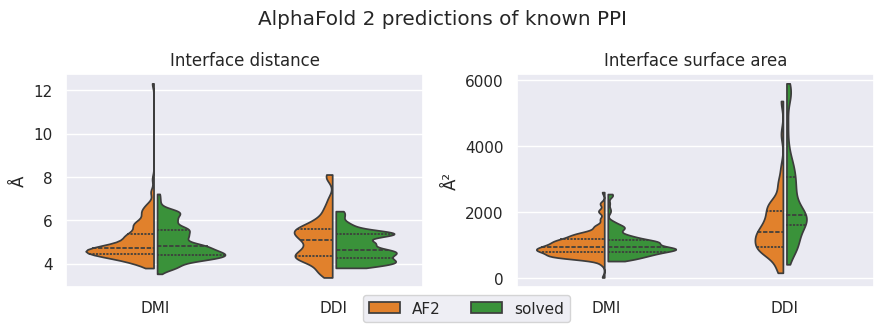

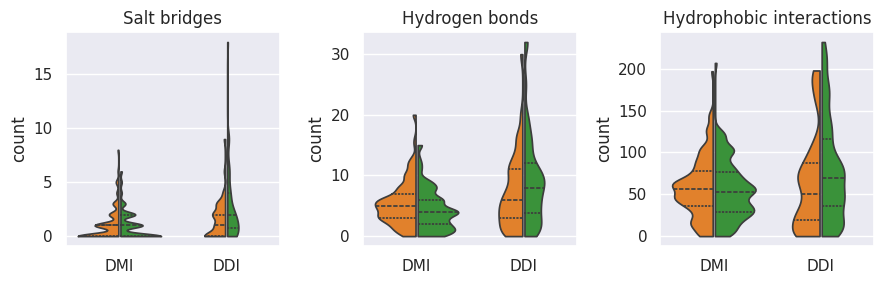

In [108]:
plot_interface_metrics_vs_solved(af_v="AF2", rmsd_filter=False, model_id_filter=True, save=True)

In [ ]:
dataAF[(dataAF["RMSD_all_atom_peptide_AF3"] < 2) & (dataAF["model_id"] == "ranked_0") & (dataAF["benchmark_set"] == "known_DMI")]["buried_area_AF3"]

0       602.041
5      1250.340
10      848.152
20      962.633
40     1226.296
45      691.455
55     1099.009
60     1162.085
65     1181.219
75     1222.284
105    1520.381
130    1046.467
135     791.431
140     582.874
175     883.569
195    1470.519
200    1590.575
205    1368.030
210    1829.881
215     679.102
220     767.178
230     761.997
250     848.158
260     892.545
270    1086.726
285     645.434
290     747.353
310     856.017
315    1058.333
345     913.604
355     790.418
360     980.846
370    1680.211
395     685.796
400     847.870
410     877.798
420    1258.148
440     937.619
445    1268.388
450    1001.931
525     788.449
530     606.027
535     761.000
540     669.835
565     749.551
575     844.073
580     963.830
595    1966.162
600     642.140
605    1096.010
610    1126.606
615     600.887
625    1229.526
630     595.035
635    1066.322
640     890.240
650     828.133
660    1070.678
675     886.982
Name: buried_area_AF3, dtype: float64

344 3170


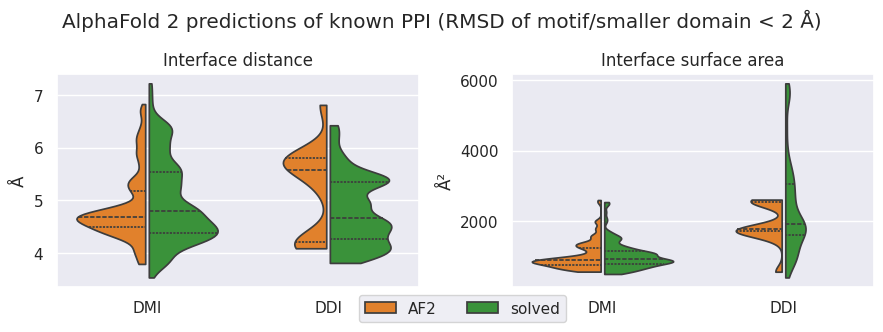

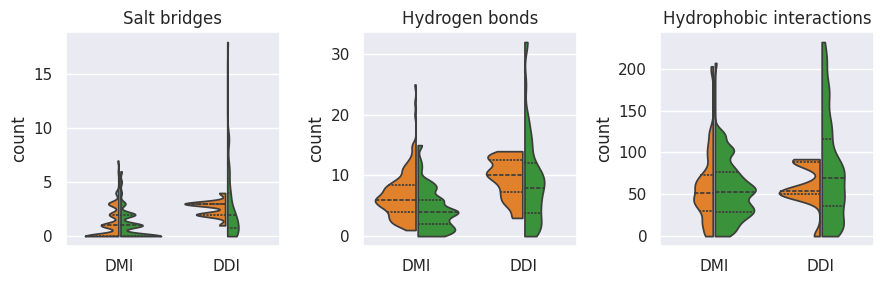

In [109]:
plot_interface_metrics_vs_solved(af_v="AF2", rmsd_filter=2, model_id_filter=False, save=True)

634 3170


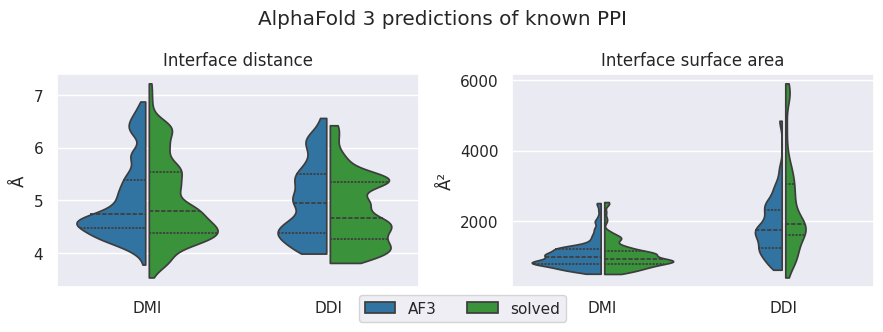

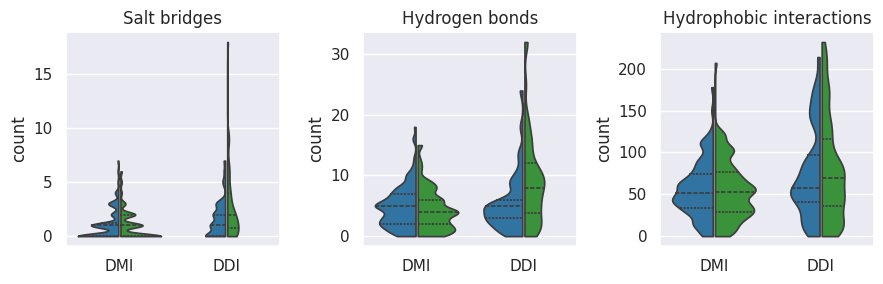

In [110]:
plot_interface_metrics_vs_solved(af_v="AF3", rmsd_filter=False, model_id_filter=True, save=True)

### 2 ROC curves

Old AF metrics

In [223]:
xticks[0].get_loc()

1

In [336]:
def plot_roc_curves(af_v: Literal["AF2", "AF3"], metric_set: Literal["AF_metrics", "interface_metrics"], model_id_filter: bool, rmsd_filter: bool, save: bool):
    sns.set_theme()
    fig, axes = plt.subplots(2, 3, figsize=(10,7))
    fig.suptitle(f"AlphaFold {'3' if af_v == 'AF3' else '2'}")

    classes = {
        "correct sidechain\n(RMSD motif < 2Å)": (-np.inf, 2), 
        "correct backbone\n(RMSD motif < 5Å)": (2, 5), 
        "correct pocket\n(RMSD motif < 15Å)": (5, 15), 
        "wrong pocket\n(RMSD motif >= 15Å)": (15, np.inf)
    }

    if metric_set == "AF_metrics":
        metric_columns = [("model confidence", "model_confidence") if af_v == "AF2" else ("ranking_ core", "ranking_score") ,
                        ("Domain chain interface pLDDDT", "chainA_intf_avg_plddt"),
                        ("Motif chain interface pLDDT", "chainB_intf_avg_plddt"),
                        ("Average interface pLDDT", "intf_avg_plddt"),
                        ("pDockQ", "pDockQ"),
                        ("iPAE", "iPAE", True),
                        ("Residue-residue contact", "num_res_res_contact"),
                        ("Atom-Atom contact", "num_atom_atom_contact"),
                        ]
    elif metric_set == "interface_metrics":
        metric_columns = [("Interface distance", "min_distance", True),
                        ("Interface surface area", "buried_area"),
                        ("Salt bridges", "salt_bridges"),
                        ("Hydrophobic interactions", "hydrophobic_interactions"),
                        ("Hydrogen bonds", "hbonds"),
                        ]

    # (display name, column name, [reverse], [highlight]) # Note: rever, highlight optional. highligh means
    metric_columns = [[x[0], x[1] + "_"+af_v, x[2] if len(x) >= 3 else False, x[3] if len(x) >= 4 else False] for x in metric_columns]

    rows_sets = {
        "known_DMI": dataAF[dataAF["benchmark_set"] == "known_DMI"],
        "known_DDI": dataAF[dataAF["benchmark_set"] == "known_DDI"],
        "mutations1_DMI": dataAF[dataAF["num_mutations"] == 1],
        "mutations2_DMI": dataAF[dataAF["num_mutations"] == 2],
        "random_DMI": dataAF[dataAF["benchmark_set"] == "random_DMI"],
        "random_DDI": dataAF[dataAF["benchmark_set"] == "random_DDI"],
    }
    for c, (b_lower, b_upper) in classes.items():
        rows_sets[c.split("\n")[0]] = dataAF[(dataAF["benchmark_set"] == "known_DMI") & (dataAF[f"RMSD_all_atom_peptide_{af_v}"] >= b_lower) & (dataAF[f"RMSD_all_atom_peptide_{af_v}"] < b_upper)]

    if model_id_filter:
        rows_sets = {lbl: df[df["model_id"] == "ranked_0"] for lbl, df in rows_sets.items()}

    plot_obj = [] # (ax, rows_true, rows_false, (title, [set color]))
    if rmsd_filter:
        plot_obj = [
            (axes[0,0], rows_sets["correct sidechain"], rows_sets["correct backbone"], ("known DMI:\ncorrect sidechain vs. correct backbone", "gold")),
            (axes[0,1], rows_sets["correct sidechain"], rows_sets["correct pocket"], ("known DMI:\ncorrect sidechain vs. correct pocket", "tab:orange")),
            (axes[0,2], rows_sets["correct sidechain"], rows_sets["wrong pocket"], ("known DMI:\ncorrect sidechain vs. wrong pocket", "tab:red")),
            (axes[1,0], rows_sets["correct sidechain"], rows_sets["random_DMI"], ("known DMI & correct sidechain \nvs. randomly paired", "tab:blue")),
        ]
    else:
        plot_obj = [
            (axes[0,0], rows_sets["known_DMI"], rows_sets["mutations1_DMI"], ("known DMI vs.\n1 mutation in motif",)),
            (axes[0,1], rows_sets["known_DMI"], rows_sets["mutations2_DMI"], ("known DMI vs.\n2 mutations in motif",)),
            (axes[0,2], rows_sets["known_DMI"], rows_sets["random_DMI"], ("known DMI vs.\nrandomly paired",)),
            (axes[1,0], rows_sets["known_DDI"], rows_sets["random_DDI"], ("known DDI vs.\nrandomly paired",))
        ]
    axes[1,1].set_title("Area under the ROC curve")
    axes[1,2].set_title("")

    for i, (ax, rows_true, rows_false, title) in enumerate(plot_obj):
        ax: Axes = ax
        for ii, (metric_label, metric_column, reverse, highlight) in enumerate(metric_columns):
            tr = rows_true[metric_column].dropna()
            fa = rows_false[metric_column].dropna()
            y_true = [1]*len(tr) + [0]*len(fa) if not reverse else [0]*len(tr) + [1]*len(fa)
            y_score = tr.to_list() + fa.to_list()
            p = ax.plot(*roc_curve(y_true, y_score)[0:2])
            c = p[0].get_color()
            roc_score = roc_auc_score(y_true, y_score)
            lbl = None
            if i == 0:
                lbl = metric_label
            c_width = 0.5/len(metric_columns)
            axes[1,1].bar([(1-(1.5*c_width)*(len(metric_columns)-1)/2)+i+ii*1.5*c_width], [roc_score], width=c_width, color=c, label=lbl)

        ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label="random predictor")
        ax.set_xlim([0,1])
        ax.set_ylim([0,1])
        ax.set_aspect(1)
        ax.set_xlabel('False Positive Rate\n')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(title[0])
        if rmsd_filter:
            c1 = matplotlib.patches.Circle((0.06, 0.93), 0.03, color="tab:green")
            c2 = matplotlib.patches.Circle((0.14, 0.93), 0.03, color=title[1])
            ax.add_patch(c1)
            ax.add_patch(c2)

    if rmsd_filter:
        axes[1,1].set_xticks([1,2,3,4], ["","","",""])
        for i, pltObj in enumerate(plot_obj):
            c1 = matplotlib.patches.Ellipse((i+0.93,-0.1), 0.1, 0.065, color="tab:green", clip_on=False)
            c2 = matplotlib.patches.Ellipse((i+1.07,-0.1), 0.1, 0.065, color=pltObj[3][1], clip_on=False)
            axes[1,1].add_patch(c1)
            axes[1,1].add_patch(c2)
    else:
        axes[1,1].set_xticks([1,2,3,4], [v[3][-1] for v in plot_obj])
    axes[1,1].set_ylabel("area")
    axes[1,1].plot([0.5, 4.5], [0.5, 0.5], color='navy', lw=1, linestyle='--')
    axes[1,1].set_xlim([0.5,4.5])
    axes[1,1].set_ylim([0,1])
    axes[0,0].legend(frameon=False, loc="lower right")

    fig.tight_layout()

    ax11_pos = axes[1,1].get_position()
    ax11_pos.x1 += 1/3
    axes[1,1].set_position(ax11_pos)
    axes[1,2].set_visible(False)

    if len(metric_columns) >= 6:
        axes[1,1].legend(loc='upper center', bbox_to_anchor=(0.2, -0.2),
                fancybox=False, shadow=False, ncol=4, frameon=False)
    else:
        axes[1,1].legend(ncol=2, frameon=False)

    fig.text(0.03,0.91, "A", fontsize=18)
    fig.text(0.03,0.45, "B", fontsize=18)
    fig.text(0.355,0.45, "C", fontsize=18)

    if save:
        plt.savefig(f"./plots/{af_v}_ROC_curve{'_new_metrics' if metric_set == 'interface_metrics' else ''}{'_RMSD' if rmsd_filter else ''}{'_best_ranked' if model_id_filter else '_all'}.png", bbox_inches='tight', dpi=600)
    plt.show()

In [284]:
plot_roc_curves(af_v="AF2", metric_set="AF_metrics", model_id_filter=True, rmsd_filter=False, save=True)

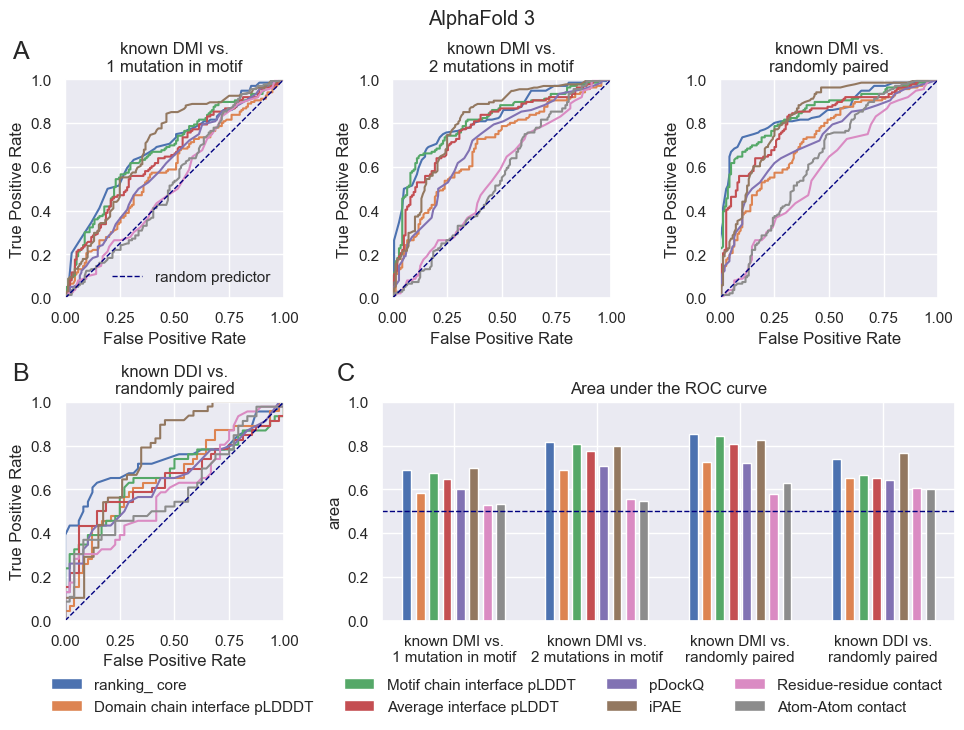

In [278]:
plot_roc_curves(af_v="AF3", metric_set="AF_metrics", model_id_filter=True, rmsd_filter=False, save=True)

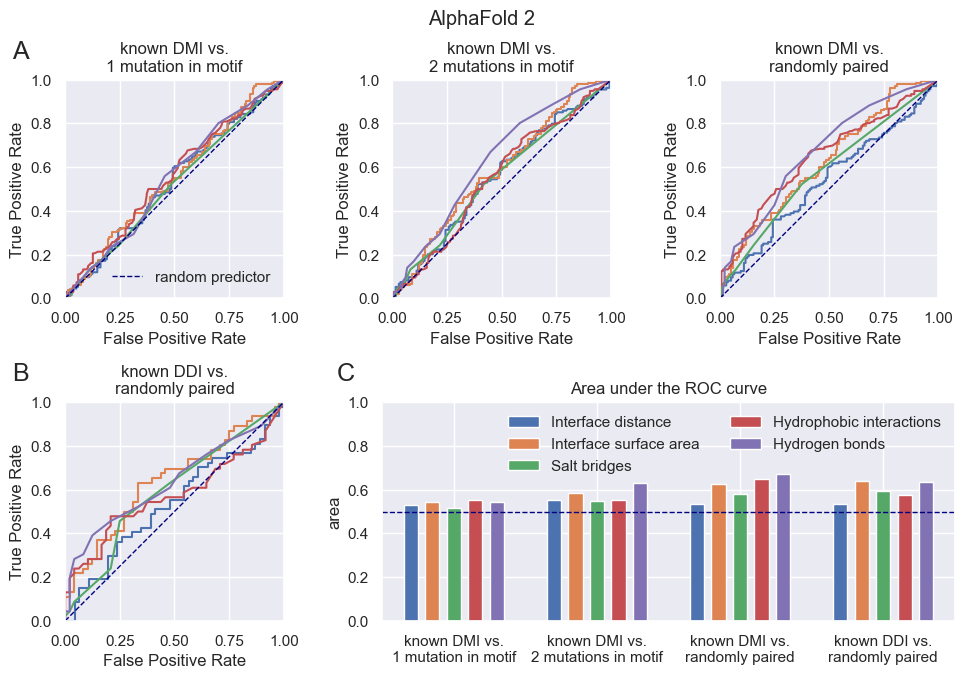

In [279]:
plot_roc_curves(af_v="AF2", metric_set="interface_metrics", model_id_filter=True, rmsd_filter=False, save=True)

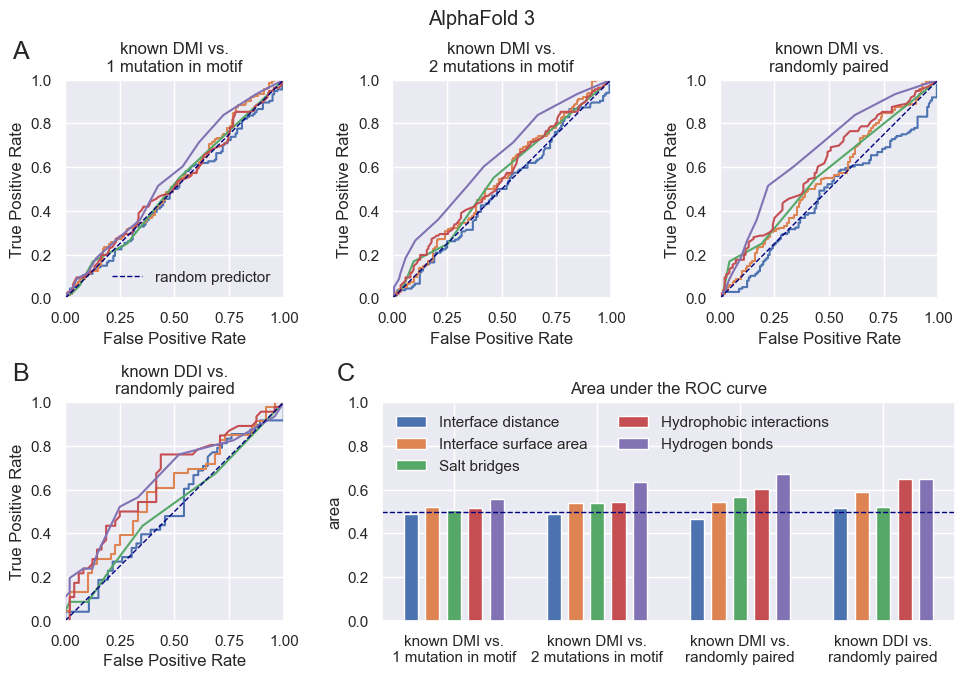

In [280]:
plot_roc_curves(af_v="AF3", metric_set="interface_metrics", model_id_filter=True, rmsd_filter=False, save=True)

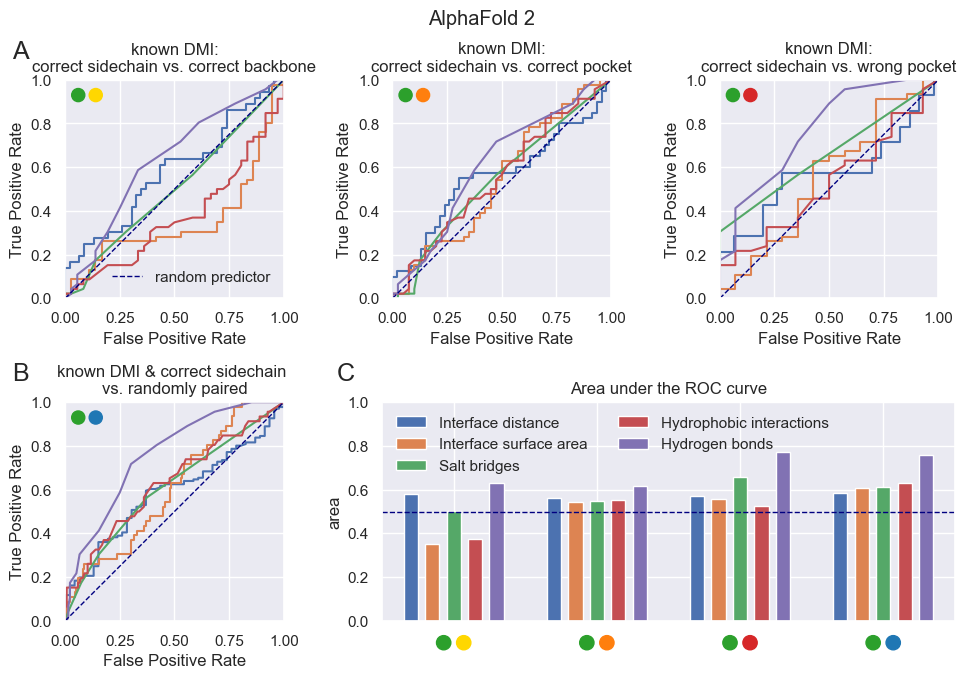

In [345]:
plot_roc_curves(af_v="AF2", metric_set="interface_metrics", model_id_filter=True, rmsd_filter=True, save=True)

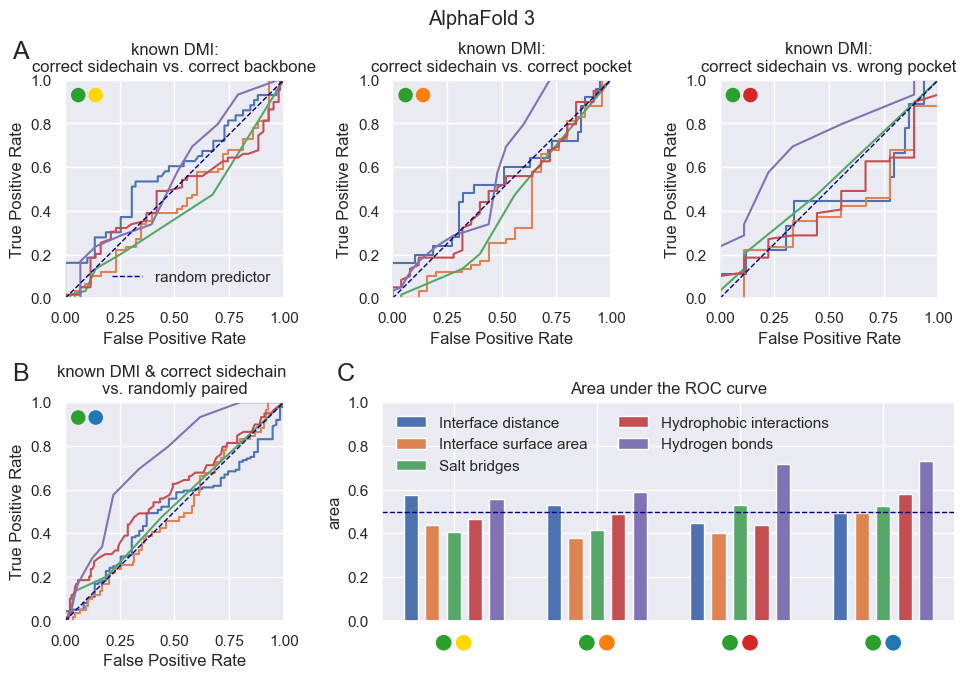

In [344]:
plot_roc_curves(af_v="AF3", metric_set="interface_metrics", model_id_filter=True, rmsd_filter=True, save=True)

In [343]:
plot_roc_curves(af_v="AF2", metric_set="AF_metrics", model_id_filter=True, rmsd_filter=True, save=True)

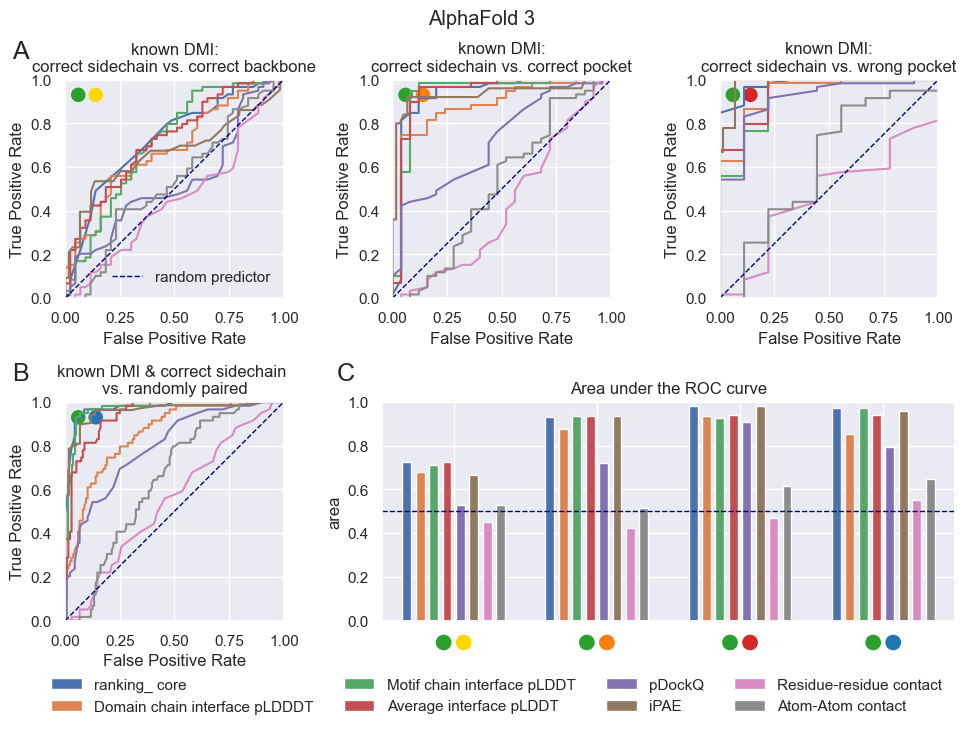

In [342]:
plot_roc_curves(af_v="AF3", metric_set="AF_metrics", model_id_filter=True, rmsd_filter=True, save=True)

(array([0.        , 0.        , 0.        , 0.        , 0.35714286,
        1.        ]),
 array([0.        , 0.02173913, 0.04347826, 0.30434783, 0.56521739,
        1.        ]),
 array([inf,  6.,  4.,  2.,  1.,  0.]))

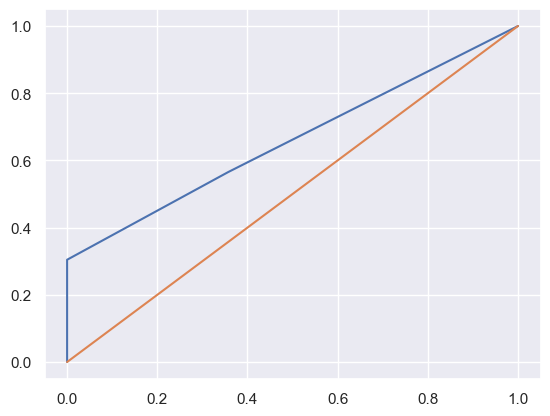

In [355]:
# Manual tests as some of the data is really weird
fig, ax = plt.subplots(1,1)
tr = dataAF[(dataAF["benchmark_set"] == "known_DMI") & (dataAF["model_id"] == "ranked_0") & (dataAF["RMSD_all_atom_peptide_AF2"] < 2)]["salt_bridges_AF2"].dropna()
fa = dataAF[(dataAF["benchmark_set"] == "known_DMI") & (dataAF["model_id"] == "ranked_0") & (dataAF["RMSD_all_atom_peptide_AF2"] >= 15) & (dataAF["RMSD_all_atom_peptide_AF2"] < np.inf)]["salt_bridges_AF2"].dropna()
#fa = dataAF[(dataAF["benchmark_set"] == "random_DMI") & (dataAF["model_id"] == "ranked_0") ]["hbonds_AF2"].dropna()
y_true = [1]*len(tr) + [0]*len(fa)
y_score = tr.to_list() + fa.to_list()
#y_true = [1-y for y in y_true]
p = ax.plot(*roc_curve(y_true, y_score)[0:2])
display(roc_curve(y_true, y_score))
ax.plot([0,1], [0,1])
plt.show()

In [364]:
np.count_nonzero(tr > 1)/len(tr)

0.30434782608695654

{'bodies': [<matplotlib.collections.FillBetweenPolyCollection at 0x26825fcc3e0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x26824fcbfe0>,
 'cmins': <matplotlib.collections.LineCollection at 0x26824ee2630>,
 'cbars': <matplotlib.collections.LineCollection at 0x26824fcbe60>}

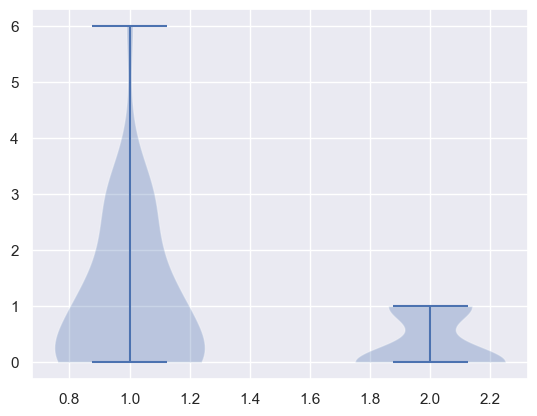

In [352]:
plt.violinplot([tr,fa])

In [316]:
dataAF[(dataAF["benchmark_set"] == "known_DMI") & (dataAF["model_id"] == "ranked_0") & (dataAF["RMSD_all_atom_peptide_AF3"] < 2)]

model_preset benchmark_set              prediction_name  model_id  \
0     alphafold3     known_DMI       DEG_APCC_KENBOX_2_4GGD  ranked_0   
5     alphafold3     known_DMI              DEG_COP1_1_5IGO  ranked_0   
10    alphafold3     known_DMI       DEG_Kelch_Keap1_1_2FLU  ranked_0   
20    alphafold3     known_DMI         DEG_MDM2_SWIB_1_1YCR  ranked_0   
40    alphafold3     known_DMI              DEG_SIAH_1_2A25  ranked_0   
45    alphafold3     known_DMI          DEG_SPOP_SBC_1_3HQM  ranked_0   
55    alphafold3     known_DMI          DOC_ANK_TNKS_1_3TWU  ranked_0   
60    alphafold3     known_DMI         DOC_CDC14_PxL_1_6G84  ranked_0   
65    alphafold3     known_DMI        DOC_CYCLIN_RxL_1_1H25  ranked_0   
75    alphafold3     known_DMI          DOC_MAPK_DCC_7_2B9J  ranked_0   
105   alphafold3     known_DMI         DOC_MAPK_RevD_3_3TEI  ranked_0   
130   alphafold3     known_DMI        DOC_PP2B_PxIxI_1_4F0Z  ranked_0   
135   alphafold3     known_DMI         DOC_SPAK_OSR1_1_2V3S  ranked_0   
140   alphafold3     known_DMI         DOC_USP7_MATH_1_3MQS  ranked_0   
175   alphafold3     known_DMI         LIG_APCC_ABBA_1_4BH6  ranked_0   
195   alphafold3     known_DMI        LIG_Actin_RPEL_3_2V51  ranked_0   
200   alphafold3     known_DMI         LIG_Actin_WH2_1_2A41  ranked_0   
205   alphafold3     known_DMI         LIG_Actin_WH2_2_2D1K  ranked_0   
210   alphafold3     known_DMI            LIG_BH_BH3_1_2ROC  ranked_0   
215   alphafold3     known_DMI           LIG_BIR_III_2_1NW9  ranked_0   
220   alphafold3     known_DMI           LIG_BIR_III_3_1JD5  ranked_0   
230   alphafold3     known_DMI           LIG_CAP-Gly_2_3RDV  ranked_0   
250   alphafold3     known_DMI           LIG_CSL_BTD_1_4J2X  ranked_0   
260   alphafold3     known_DMI    LIG_Clathr_ClatBox_1_1C9I  ranked_0   
270   alphafold3     known_DMI       LIG_Dynein_DLC8_1_1F95  ranked_0   
285   alphafold3     known_DMI                LIG_EH_1_1FF1  ranked_0   
290   alphafold3     known_DMI              LIG_EVH1_1_1EVH  ranked_0   
310   alphafold3     known_DMI           LIG_FXI_DFP_1_5EOD  ranked_0   
315   alphafold3     known_DMI        LIG_GBD_Chelix_1_2K42  ranked_0   
345   alphafold3     known_DMI          LIG_LIR_Apic_2_4EOY  ranked_0   
355   alphafold3     known_DMI          LIG_LIR_LC3C_4_3VVW  ranked_0   
360   alphafold3     known_DMI           LIG_LIR_Nem_3_5AZG  ranked_0   
370   alphafold3     known_DMI         LIG_LSD1_SNAG_1_2Y48  ranked_0   
395   alphafold3     known_DMI       LIG_MLH1_MIPbox_1_4FMO  ranked_0   
400   alphafold3     known_DMI              LIG_MYND_2_2ODD  ranked_0   
410   alphafold3     known_DMI               LIG_NRBOX_1GWQ  ranked_0   
420   alphafold3     known_DMI        LIG_OCRL_FandH_1_3QIS  ranked_0   
440   alphafold3     known_DMI         LIG_PCNA_APIM_2_5MLW  ranked_0   
445   alphafold3     known_DMI       LIG_PCNA_PIPBox_1_1AXC  ranked_0   
450   alphafold3     known_DMI          LIG_PCNA_TLS_4_2ZVL  ranked_0   
525   alphafold3     known_DMI               LIG_SH3_2_1CKA  ranked_0   
530   alphafold3     known_DMI               LIG_SH3_3_2GBQ  ranked_0   
535   alphafold3     known_DMI  LIG_SH3_CIN85_PxpxPR_1_2BZ8  ranked_0   
540   alphafold3     known_DMI              LIG_SPRY_1_2JK9  ranked_0   
565   alphafold3     known_DMI                 LIG_TPR_1ELR  ranked_0   
575   alphafold3     known_DMI             LIG_TRAF2_2_1CZY  ranked_0   
580   alphafold3     known_DMI              LIG_TRFH_1_3BQO  ranked_0   
595   alphafold3     known_DMI           LIG_Vh1_VBS_1_1SYQ  ranked_0   
600   alphafold3     known_DMI     LIG_WD40_WDR5_VDV_1_4CY2  ranked_0   
605   alphafold3     known_DMI     LIG_WD40_WDR5_WIN_1_3UVK  ranked_0   
610   alphafold3     known_DMI     LIG_WD40_WDR5_WIN_2_4CY3  ranked_0   
615   alphafold3     known_DMI                LIG_WW_1_1EG4  ranked_0   
625   alphafold3     known_DMI               MOD_PKB_1_1O6K  ranked_0   
630   alphafold3     known_DMI          MOD_SUMO_for_1_1KPS  r

### 3 RMSD Classifications

RMSD motif distribution

In [135]:
def plot_rmsd_dist(ax, af_v: Literal["AF2", "AF3"], model_filter: bool, title:bool):
    data_mask = True
    if model_filter:
        data_mask &= (dataAF["model_id"] == "ranked_0")
    d = dataAF[(dataAF["benchmark_set"] == "known_DMI") & data_mask][f"RMSD_all_atom_peptide_{af_v}"]
    p = sns.violinplot(ax=ax, data=d, bw_adjust=0.5, cut=0)
    if title:
        p.set_title(f"{af_v} predictions of 136 DMIs")
    p.set_ylabel("motif RMSD [Å]")
    ax.set_ylim(p.get_ylim())
    ax.set_xlim([-0.45,0.53])
    ax.bar([0.5], [2], bottom=0, width=0.1, label="Correct sidechain", color="tab:green")
    ax.bar([0.5], [5], bottom=2, width=0.1, label="Correct backbone", color="gold")
    ax.bar([0.5], [15], bottom=5, width=0.1, label="Correct backbone", color="tab:orange")
    ax.bar([0.5], [ax.get_ylim()[1]], bottom=15, width=0.1, label="Correct backbone", color="tab:red")
    ax.set_aspect(1/ax.get_ylim()[1]/0.75)
    print(f"Max RMSD: {np.max(d):1.3f} A")

In [127]:
def plot_classifications(ax, af_v: Literal["AF2", "AF3"], model_filter: bool, lbl_mode: Literal["full", "short", "none"], long_title: bool):
    classes = {
        "Correct sidechain\n(RMSD motif < 2Å)": (-np.inf, 2), 
        "Correct backbone\n(RMSD motif < 5Å)": (2, 5), 
        "Correct pocket\n(RMSD motif < 15Å)": (5, 15), 
        "Wrong pocket\n(RMSD motif >= 15Å)": (15, np.inf)
    }
    d = {}
    data_mask = True
    if model_filter:
        data_mask &= (dataAF["model_id"] == "ranked_0")
    for label, ra in classes.items():
        if lbl_mode == "short":
            label = label.split("\n")[0].replace(" ", "\n")
        d[label] = len(dataAF[(dataAF["benchmark_set"] == "known_DMI") & data_mask & (dataAF[f"RMSD_all_atom_peptide_{af_v}"] >= ra[0]) & (dataAF[f"RMSD_all_atom_peptide_{af_v}"] < ra[1])])
    ax.pie(list(d.values()), autopct=lambda v: f"{v/100*sum(d.values()):.0f}\n({v:1.0f}%)", startangle=90, counterclock=False, colors=["tab:green", "gold", "tab:orange", "tab:red"], labels=(d.keys() if lbl_mode != "none" else None))
    if long_title is not None:
        ax.set_title(f"136 AlphaFold {'3' if af_v == 'AF3' else '2'} DMI predictions classified")
    else:
        ax.set_title(f"AlphaFold {'3' if af_v == 'AF3' else '2'}")

def plot_af2_vs_af3(save:bool, model_filter: bool):
    fig, axes = plt.subplots(1,3, figsize=(9,3.5))
    plot_classifications(axes[0], af_v="AF2", model_filter=model_filter, lbl_mode="short", long_title=False)
    plot_classifications(axes[1], af_v="AF3", model_filter=model_filter, lbl_mode="none", long_title=False)
    plot_rmsd_dist(axes[2], af_v="AF3", model_filter=model_filter, title=True)
    axes[0].set_anchor("S")
    axes[1].set_anchor("S")
    axes[2].set_aspect(1/30)
    plt.tight_layout()
    fig.text(0.36, 0.86, "136 known DMI", fontsize=16, horizontalalignment="center")
    axes[0].annotate("", xytext=(1.5, 1.5), xy=(0.7, 0.7), arrowprops=dict(arrowstyle="->"))
    axes[1].annotate("", xytext=(-1.5, 1.5), xy=(-0.7, 0.7), arrowprops=dict(arrowstyle="->"))
    fig.text(0.04,0.91, "A", fontsize=18)
    fig.text(0.67,0.91, "B", fontsize=18)
    if save:
        plt.savefig(f"./plots/AF2_vs_AF3_DMI_RMSD_motif{'_best_ranked' if model_filter else ''}.png", bbox_inches='tight', dpi=600)
    plt.show()


def plot_af2_DMI_RMSD(save:bool, model_filter: bool):
    fig, axes = plt.subplots(1,2, figsize=(9,3.5))
    plot_classifications(axes[0], af_v="AF2", model_filter=model_filter, lbl_mode="full", long_title=True)
    plot_rmsd_dist(axes[1], af_v="AF2", model_filter=model_filter, title=True)
    plt.tight_layout()
    fig.text(0.04,0.91, "A", fontsize=18)
    fig.text(0.6,0.91, "B", fontsize=18)
    if save:
        plt.savefig(f"./plots/AF2_knownDMI_RMSD_motif{'_best_ranked' if model_filter else ''}.png", bbox_inches='tight', dpi=600)
    plt.show()

Max RMSD: 44.644 A


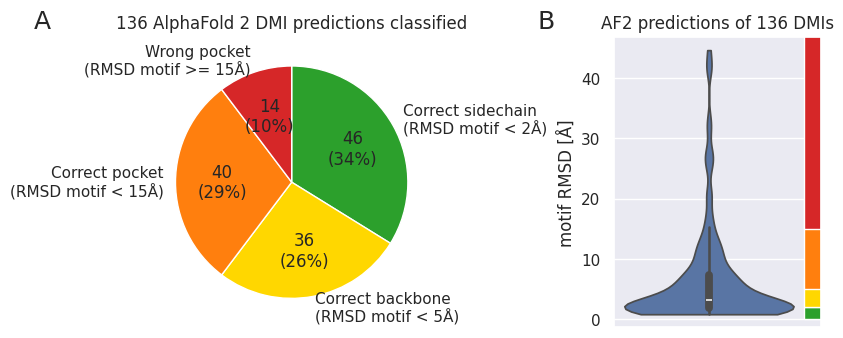

In [137]:
plot_af2_DMI_RMSD(save=False, model_filter=True)

In [136]:
plot_af2_DMI_RMSD(save=False, model_filter=False)

Max RMSD: 184.071 A


In [ ]:
plt.figure(figsize=(3,5))
plot_rmsd_dist(plt.gca(), af_v="AF2", model_filter=True, title=True)
plt.show()

In [ ]:
plt.figure(figsize=(3,5))
plot_rmsd_dist(plt.gca(), af_v="AF3", model_filter=True, title=True)
plt.show()

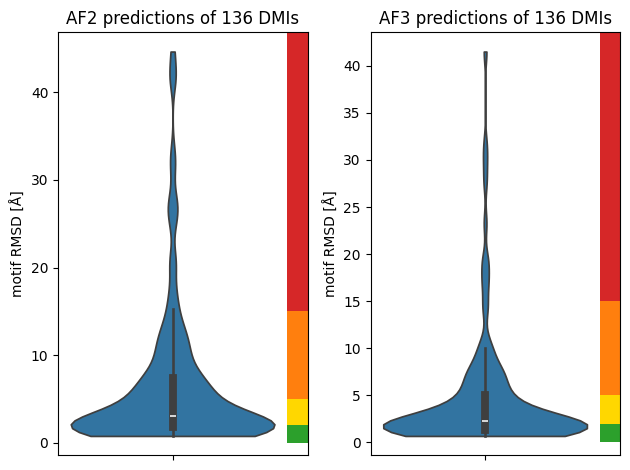

In [ ]:
fig, axes = plt.subplots(1,2)
plot_rmsd_dist(axes[0], af_v="AF2", model_filter=True, title=True)
plot_rmsd_dist(axes[1], af_v="AF3", model_filter=True, title=True)
plt.tight_layout()
plt.show()

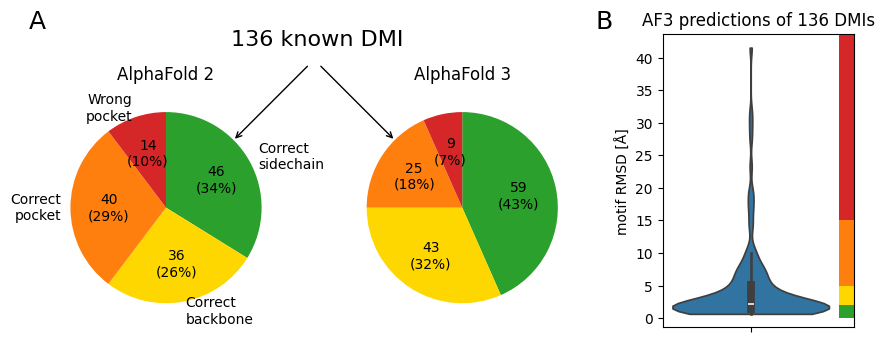

In [44]:
plot_af2_vs_af3(save=False, model_filter=True)

Overall AF3 performance

In [143]:
d = dataAF[(dataAF["benchmark_set"] == "known_DMI") & (dataAF["model_id"] == "ranked_0")]
print(f"mean RMSD motif of AF2 known DMI: {np.nanmean(d["RMSD_all_atom_peptide_AF2"]):1.3f} +- {np.nanstd(d["RMSD_all_atom_peptide_AF2"]):1.3f}")
print(f"mean RMSD motif of AF3 known DMI: {np.nanmean(d["RMSD_all_atom_peptide_AF3"]):1.3f} +- {np.nanstd(d["RMSD_all_atom_peptide_AF3"]):1.3f}")

print(f"median RMSD motif of AF2 known DMI: {np.nanmedian(d["RMSD_all_atom_peptide_AF2"]):1.3f}")
print(f"median RMSD motif of AF3 known DMI: {np.nanmedian(d["RMSD_all_atom_peptide_AF3"]):1.3f}")

print(f"AF2 overall mean RMSD: {np.nanmean(d["RMSD_all_atom_AF2"]):1.3f} +- {np.nanstd(d["RMSD_all_atom_AF2"]):1.3f}")
print(f"AF3 overall mean RMSD: {np.nanmean(d["RMSD_all_atom_AF3"]):1.3f} +- {np.nanstd(d["RMSD_all_atom_AF3"]):1.3f}")

print(f"AF2 overall median RMSD: {np.nanmedian(d["RMSD_all_atom_AF2"]):1.3f}")
print(f"AF3 overall median RMSD: {np.nanmedian(d["RMSD_all_atom_AF3"]):1.3f}")

mean RMSD motif of AF2 known DMI: 6.624 +- 8.426
mean RMSD motif of AF3 known DMI: 4.671 +- 6.404
median RMSD motif of AF2 known DMI: 3.073
median RMSD motif of AF3 known DMI: 2.254
AF2 overall mean RMSD: 2.743 +- 1.789
AF3 overall mean RMSD: 2.385 +- 1.662
AF2 overall median RMSD: 1.979
AF3 overall median RMSD: 1.769


In [145]:
d = dataAF[(dataAF["benchmark_set"] == "known_DMI")]
print(f"mean RMSD motif of AF2 known DMI (all): {np.nanmean(d["RMSD_all_atom_peptide_AF2"]):1.3f} +- {np.nanstd(d["RMSD_all_atom_peptide_AF2"]):1.3f}")
print(f"mean RMSD motif of AF3 known DMI (all): {np.nanmean(d["RMSD_all_atom_peptide_AF3"]):1.3f} +- {np.nanstd(d["RMSD_all_atom_peptide_AF3"]):1.3f}")

print(f"median RMSD motif of AF2 known DMI (all): {np.nanmedian(d["RMSD_all_atom_peptide_AF2"]):1.3f}")
print(f"median RMSD motif of AF3 known DMI (all): {np.nanmedian(d["RMSD_all_atom_peptide_AF3"]):1.3f}")

print(f"AF2 overall mean RMSD (all): {np.nanmean(d["RMSD_all_atom_AF2"]):1.3f} +- {np.nanstd(d["RMSD_all_atom_AF2"]):1.3f}")
print(f"AF3 overall mean RMSD (all): {np.nanmean(d["RMSD_all_atom_AF3"]):1.3f} +- {np.nanstd(d["RMSD_all_atom_AF3"]):1.3f}")

print(f"AF2 overall median RMSD (all): {np.nanmedian(d["RMSD_all_atom_AF2"]):1.3f}")
print(f"AF3 overall median RMSD (all): {np.nanmedian(d["RMSD_all_atom_AF3"]):1.3f}")

mean RMSD motif of AF2 known DMI (all): 8.242 +- 13.966
mean RMSD motif of AF3 known DMI (all): 5.554 +- 8.025
median RMSD motif of AF2 known DMI (all): 4.217
median RMSD motif of AF3 known DMI (all): 2.443
AF2 overall mean RMSD (all): 3.007 +- 2.692
AF3 overall mean RMSD (all): 2.636 +- 2.847
AF2 overall median RMSD (all): 2.151
AF3 overall median RMSD (all): 1.777


In [ ]:
# DDI
d = dataAF[(dataAF["benchmark_set"] == "known_DDI") & (dataAF["model_id"] == "ranked_0")]

print(f"mean RMSD motif of AF2 known DDI: {np.nanmean(d["RMSD_all_atom_peptide_AF2"]):1.3f} +- {np.nanstd(d["RMSD_all_atom_peptide_AF2"]):1.3f}")
print(f"mean RMSD motif of AF3 known DDI: {np.nanmean(d["RMSD_all_atom_peptide_AF3"]):1.3f} +- {np.nanstd(d["RMSD_all_atom_peptide_AF3"]):1.3f}")

print(f"median RMSD motif of AF2 known DDI: {np.nanmedian(d["RMSD_all_atom_peptide_AF2"]):1.3f}")
print(f"median RMSD motif of AF3 known DDI: {np.nanmedian(d["RMSD_all_atom_peptide_AF3"]):1.3f}")

print(f"AF2 overall mean RMSD DDI: {np.nanmean(d["RMSD_all_atom_AF2"]):1.3f} +- {np.nanstd(d["RMSD_all_atom_AF2"]):1.3f}")
print(f"AF3 overall mean RMSD DDI: {np.nanmean(d["RMSD_all_atom_AF3"]):1.3f} +- {np.nanstd(d["RMSD_all_atom_AF3"]):1.3f}")

print(f"AF2 overall median RMSD DDI: {np.nanmedian(d["RMSD_all_atom_AF2"]):1.3f}")
print(f"AF3 overall median RMSD DDI: {np.nanmedian(d["RMSD_all_atom_AF3"]):1.3f}")

mean RMSD motif of AF2 known DDI: 20.821 +- 19.631
mean RMSD motif of AF3 known DDI: 21.789 +- 20.178
median RMSD motif of AF2 known DDI: 13.156
median RMSD motif of AF3 known DDI: 12.109
AF2 overall mean RMSD DDI: 8.741 +- 7.529
AF3 overall mean RMSD DDI: 9.188 +- 8.414
AF2 overall median RMSD DDI: 6.124
AF3 overall median RMSD DDI: 4.647


### 4 Interface metrics violin plots

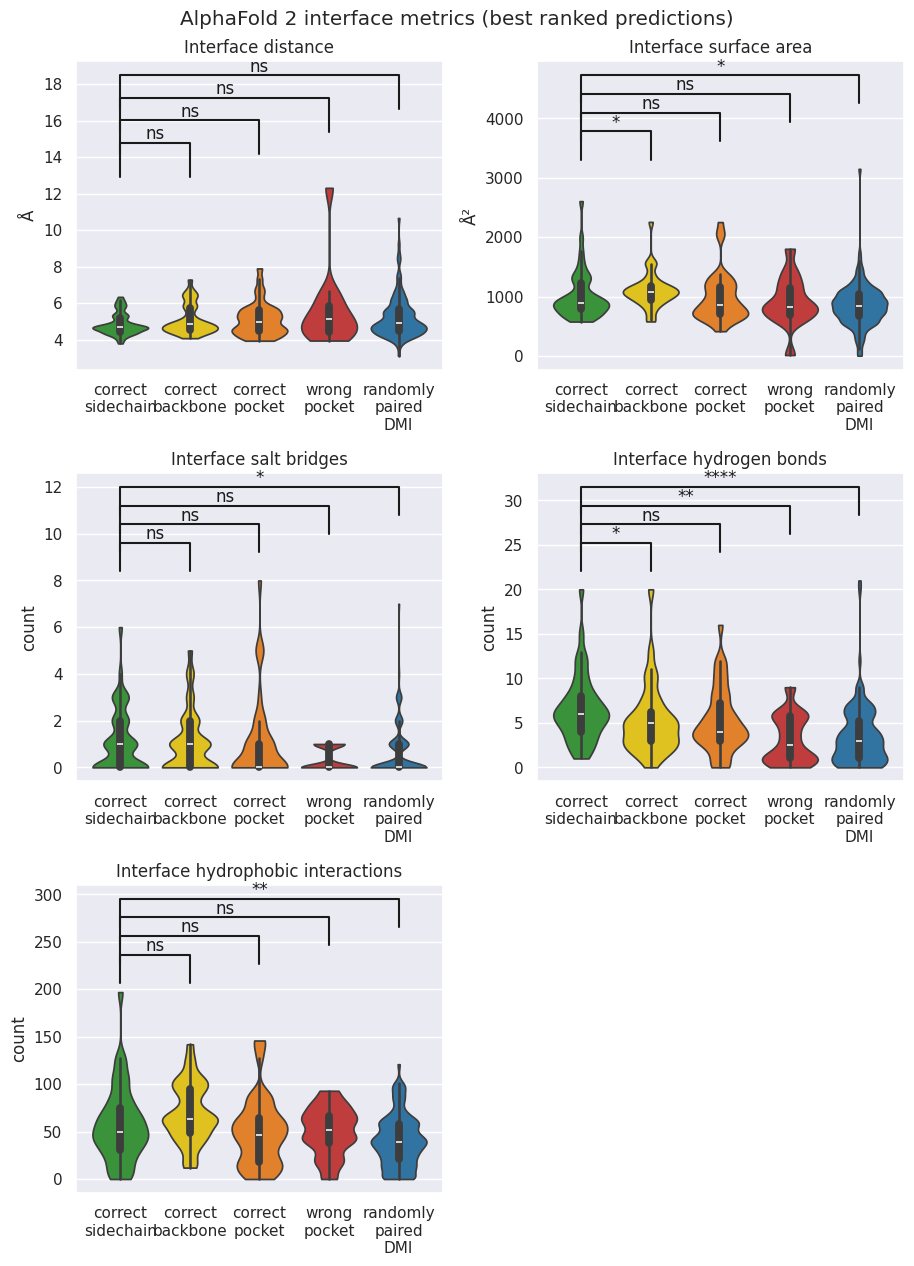

In [ ]:
def plot_significance(ax, data, col1, col2, y):
    col1 = col1.replace(" ", "\n")
    col2 = col2.replace(" ", "\n")
    data_max = np.max([max(v) for v in data.values()])
    x1, x2 = list(data.keys()).index(col1), list(data.keys()).index(col2)
    y, h, col = y*data_max, 0.15*data_max, 'k'
    #stat, pvalue = scipy.stats.ttest_ind(data[col1], data[col2], equal_var=False)
    stat, pvalue = scipy.stats.mannwhitneyu(data[col1], data[col2])
    if pvalue < 0.0001:
        pvalue_label = "****"
    elif pvalue < 0.001:
        pvalue_label = "***"
    elif pvalue < 0.01:
        pvalue_label = "**"
    elif pvalue < 0.05:
        pvalue_label = "*"
    else:
        pvalue_label = "ns"
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    ax.text((x1+x2)*.5, y+h, pvalue_label, ha='center', va='bottom', color=col)

def plot_violinplot(af_v: Literal["AF2", "AF3"], model_filter: bool, rmsd_filter: bool, save: bool):
    sns.set_theme()
    mpl.rcParams['font.family'] = 'DejaVu Sans'

    fig, axes = plt.subplots(3, 2, figsize=(9.3, 12.9))
    axes = np.ndarray.flatten(axes)
    axes[5].set_visible(False)

    categories = { # column : [title, y_label]
        f"min_distance_{af_v}": ["Interface distance", "Å"],
        f"buried_area_{af_v}": ["Interface surface area", "Å²"], 
        f"salt_bridges_{af_v}": ["Interface salt bridges", "count"], 
        f"hbonds_{af_v}": ["Interface hydrogen bonds", "count"], 
        f"hydrophobic_interactions_{af_v}": ["Interface hydrophobic interactions", "count"],
    }

    benchmark_sets = {
        "known_DMI": "known DMI", 
        "random_DMI" : "randomly paired DMI", 
        "mutations_DMI": "mutated motif DMI", 
        "known_DDI": "known DDI", 
        "random_DDI": "randomly paired DDI"
    }

    classes = {
        "correct sidechain": (-np.inf, 2), 
        "correct backbone": (2, 5), 
        "correct pocket": (5, 15), 
        "wrong pocket": (15, np.inf)
    }
    
    data_mask = True
    if model_filter:
        data_mask &= (dataAF["model_id"] == "ranked_0")

    for i, (c, (title, ylabel)) in enumerate(categories.items()):
        if rmsd_filter:
            data = {}
            for label, (b_lower, b_upper) in classes.items():
                data[label.replace(" ", "\n")] = list(dataAF[(dataAF["benchmark_set"] == "known_DMI") & data_mask & (dataAF[f"RMSD_all_atom_peptide_{af_v}"] > b_lower) & (dataAF[f"RMSD_all_atom_peptide_{af_v}"] <= b_upper)][c].dropna())
            data["randomly\npaired\nDMI"] = list(dataAF[(dataAF["benchmark_set"] == "random_DMI") & data_mask][c].dropna())
        else:
            data = {label.replace(" ", "\n"): list(dataAF[(dataAF["benchmark_set"] == benchmark_set) & data_mask][c].dropna()) for benchmark_set, label in benchmark_sets.items()}
        p = sns.violinplot(data, ax=axes[i], inner="box", cut=0, density_norm="area", bw_adjust=0.5, palette=(["tab:green", "gold", "tab:orange", "tab:red", "tab:blue"] if rmsd_filter else None))
        #p = sns.stripplot(data, ax=axes[i])
        
        p.set_title(title)
        p.set_ylabel(ylabel)

        if rmsd_filter:
            plot_significance(axes[i], data, "correct sidechain", "correct backbone", 1.05)
            plot_significance(axes[i], data, "correct sidechain", "correct pocket", 1.15)
            plot_significance(axes[i], data, "correct sidechain", "wrong pocket", 1.25)
            plot_significance(axes[i], data, "correct sidechain", "randomly paired DMI", 1.35)
        else:
            plot_significance(axes[i], data, "known DMI", "randomly paired DMI", 1.05)
            plot_significance(axes[i], data, "known DMI", "mutated motif DMI", 1.2)
            plot_significance(axes[i], data, "known DDI", "randomly paired DDI", 1.05)
    fig.suptitle(f"AlphaFold {3 if af_v == 'AF3' else 2} interface metrics" + (" (best ranked predictions)" if model_filter else ""))
    plt.tight_layout()
    if save:
        plt.savefig(f"./plots/{af_v}_interface_metrics{'_by_rmsd' if rmsd_filter else ''}{'_best_ranked' if model_filter else ''}.png", bbox_inches='tight', dpi=600)
    plt.show()

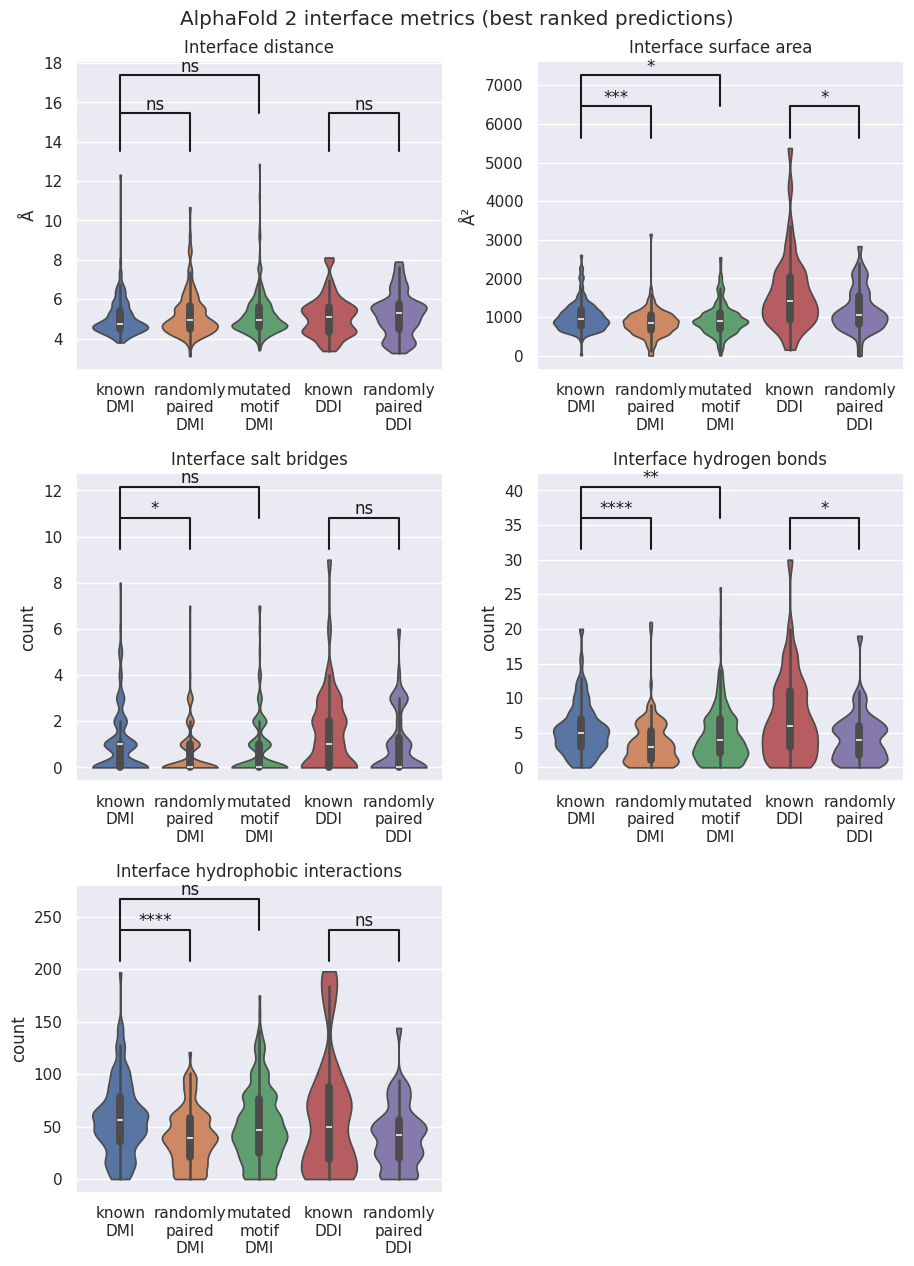

In [87]:
plot_violinplot(af_v="AF2", model_filter=True, rmsd_filter=False, save=True)

In [88]:
plot_violinplot(af_v="AF2", model_filter=False, rmsd_filter=False, save=True)

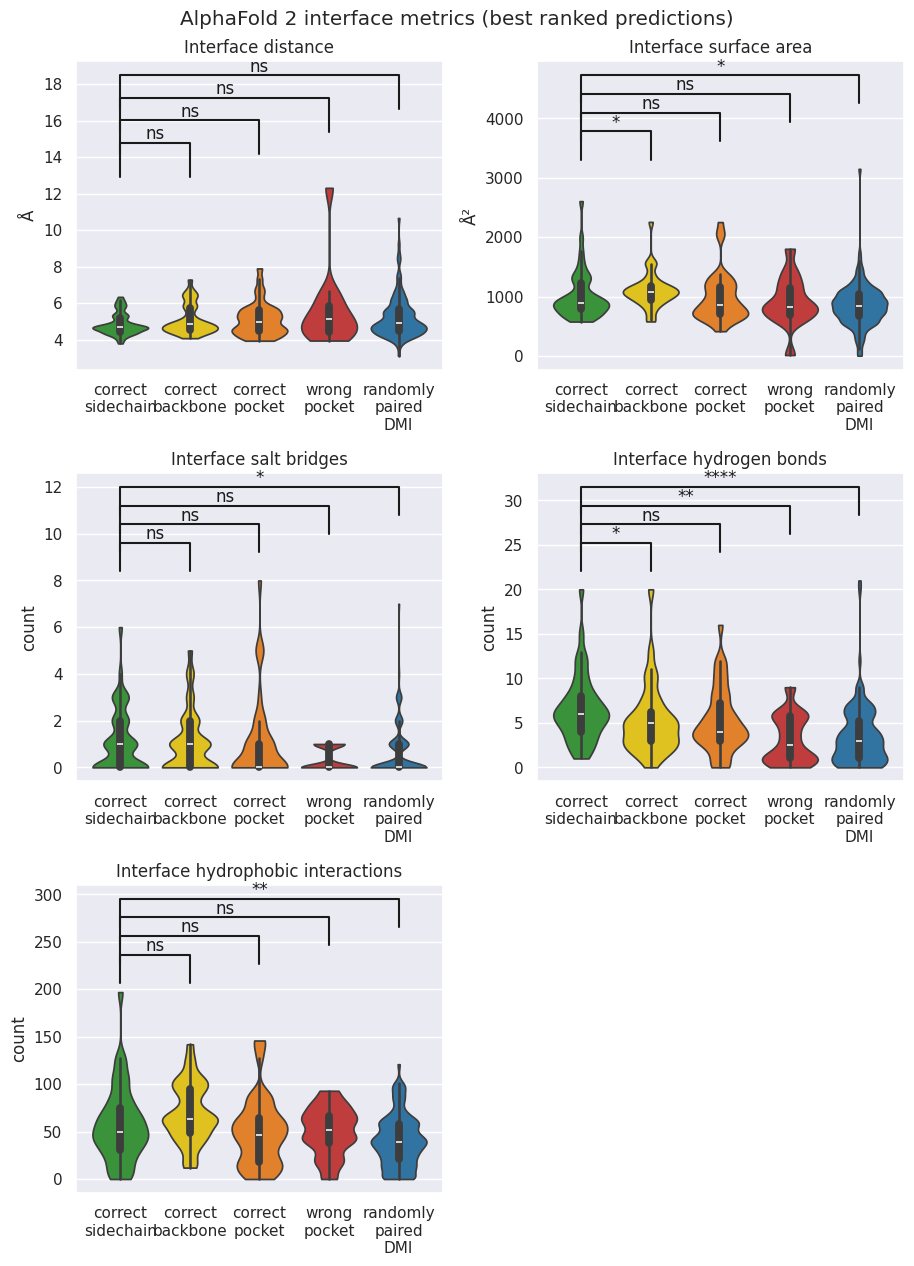

In [89]:
plot_violinplot(af_v="AF2", model_filter=True, rmsd_filter=True, save=True)

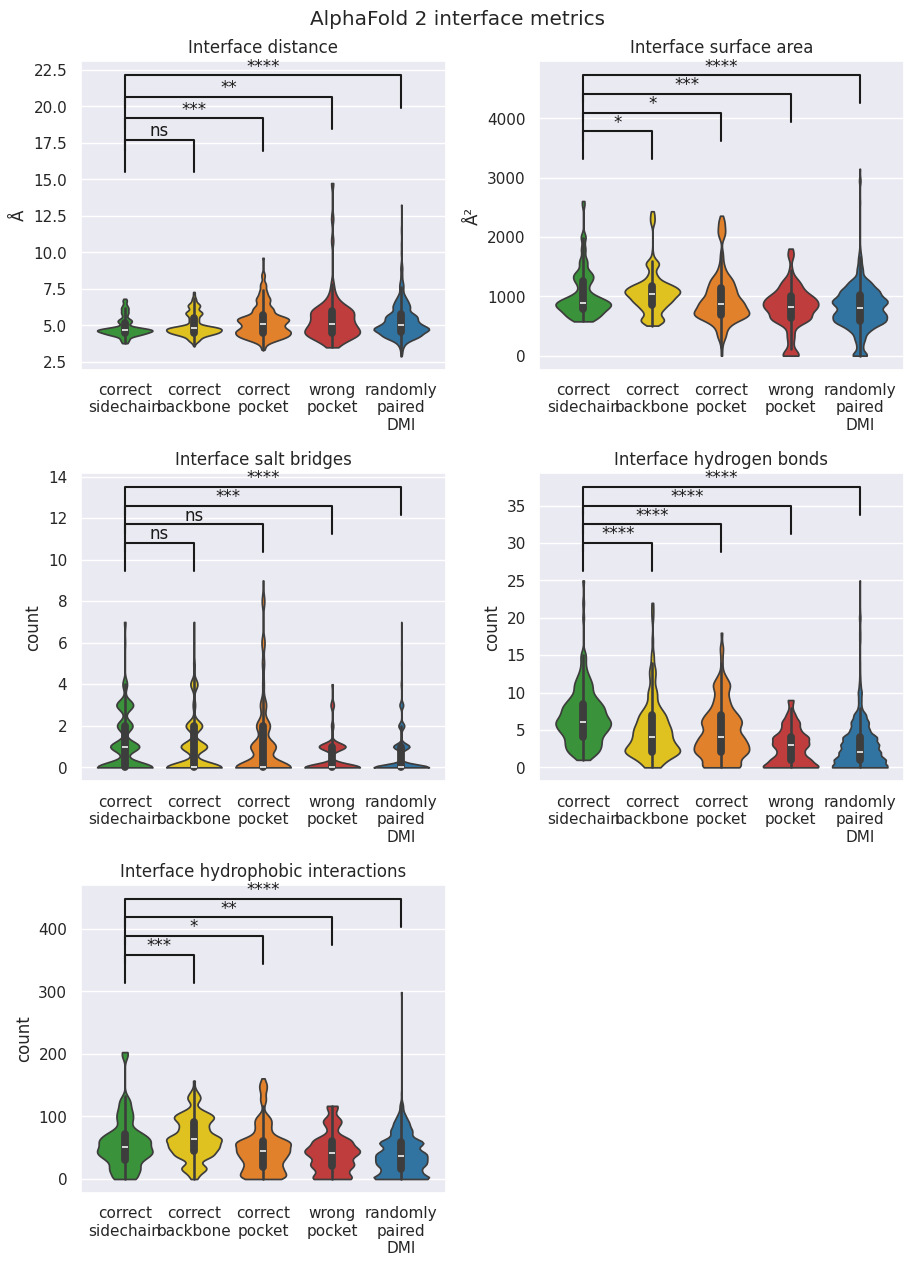

In [92]:
plot_violinplot(af_v="AF2", model_filter=False, rmsd_filter=True, save=True)

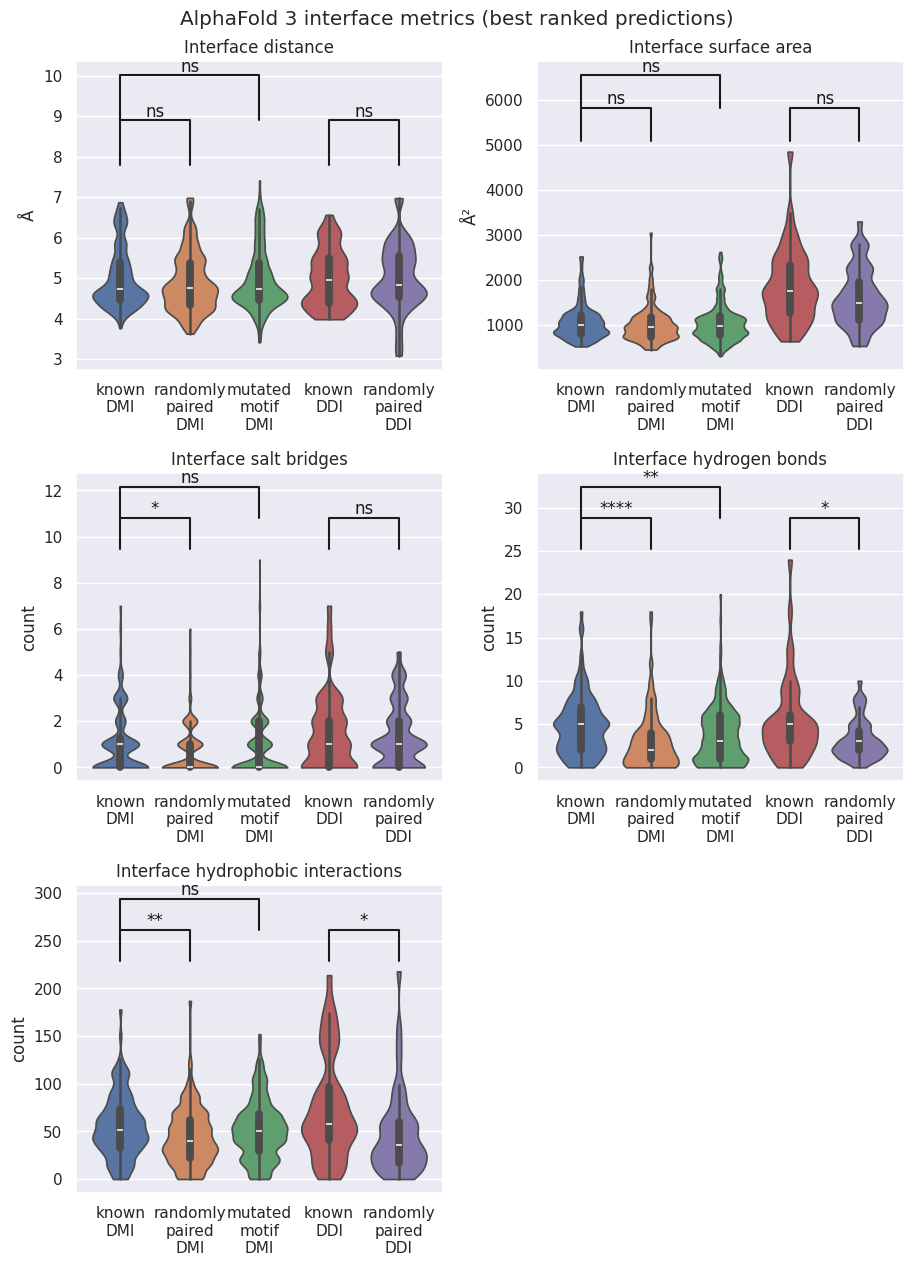

In [91]:
plot_violinplot(af_v="AF3", model_filter=True, rmsd_filter=False, save=True)

In [90]:
plot_violinplot(af_v="AF3", model_filter=True, rmsd_filter=True, save=True)

### Appendix

Quick check if I really work with the Lee et all dataset

In [307]:
dataLee_knownDMI = pd.read_excel(path_resources / "benchmark set" / "Lee et al supplemental" / "44320_2023_5_moesm3_esm.xlsx", sheet_name="AF-MMv2.2 result")
_merge = pd.merge(
    left=dataLee_knownDMI,
    right=dataAF,
    how="inner",
    on=["prediction_name", "model_id"],
    suffixes=["_Lee", ""]
)
display(_merge[["prediction_name", "model_confidence", "model_confidence_AF2", "RMSD_all_atom_peptide", "RMSD_all_atom_peptide_AF2", "iPAE", "iPAE_AF2"]])

prediction_name  model_confidence  model_confidence_AF2  \
0              DEG_SIAH_1_2A25          0.920907              0.920907   
1         DOC_USP7_MATH_1_3MQS          0.923664              0.923664   
2        DOC_PP2B_PxIxI_1_4F0Z          0.950851              0.950851   
3       DEG_Kelch_Keap1_1_2FLU          0.938596              0.938596   
4             LIG_TRAF2_2_1CZY          0.861203              0.861203   
..                         ...               ...                   ...   
131          LIG_FAT_LD_1_3GM1          0.885796              0.885796   
132  LIG_Clathr_ClatBox_2_1UTC          0.545352              0.545352   
133     DOC_PP1_MyPhoNE_1_1S70          0.611319              0.611319   
134       LIG_APCC_ABBA_1_4BH6          0.446541              0.446541   
135        LIG_AP2alpha_1_1KY7          0.553339              0.553339   

     RMSD_all_atom_peptide  RMSD_all_atom_peptide_AF2       iPAE   iPAE_AF2  
0                 0.787199                   0.787199   1.807006   1.807006  
1                 0.795526                   0.795526   1.655897   1.655897  
2                 0.811035                   0.811035   1.753244   1.753244  
3                 0.914587                   0.914587   2.017997   2.017997  
4                 0.914688                   0.914688   2.535973   2.535973  
..                     ...                        ...        ...        ...  
131              27.508253                  27.508253   1.883687   1.883687  
132              31.001265                  31.001265  13.229383  13.229383  
133              39.227875                  39.227875   8.118887   8.118887  
134              40.003876                  40.003876  15.089235  15.089235  
135              44.354069                  44.354069  10.678659  10.678659  

[136 rows x 7 columns]